# Task 1- Unsupervised Learning

Dataset access link: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df1 = pd.read_csv('C:/Users/HP/OneDrive/Documents/RIC/Machine Learning/Coursework/Unsupervised Learning/Mall_Customers.csv')

In [3]:
df1.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df1.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#Dropping the CustomerID variable, since it is not very significant
df1.drop(['CustomerID'], axis = 1, inplace = True)

In [7]:
df1.rename(columns = {'Genre' : 'Gender', 'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending' }, inplace = True)

In [8]:
df1.head()

Gender  Age  Income  Spending
0    Male   19      15        39
1    Male   21      15        81
2  Female   20      16         6
3  Female   23      16        77
4  Female   31      17        40

## Exploratory Data Analysis

<AxesSubplot:title={'center':'Gender Distibution'}, ylabel='Income'>

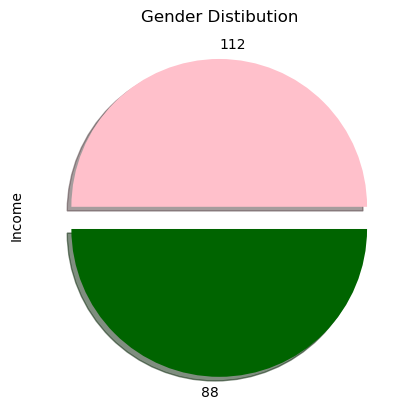

In [9]:
col= ['pink','darkgreen']
df1.groupby(['Gender']).count().loc[:,'Income'].value_counts().plot.pie(title = "Gender Distibution", colors = col, ylabel = None, explode = [0.05,0.1], shadow=True)

<AxesSubplot:title={'center':' Average Income and Spending by Gender'}, xlabel='Gender'>

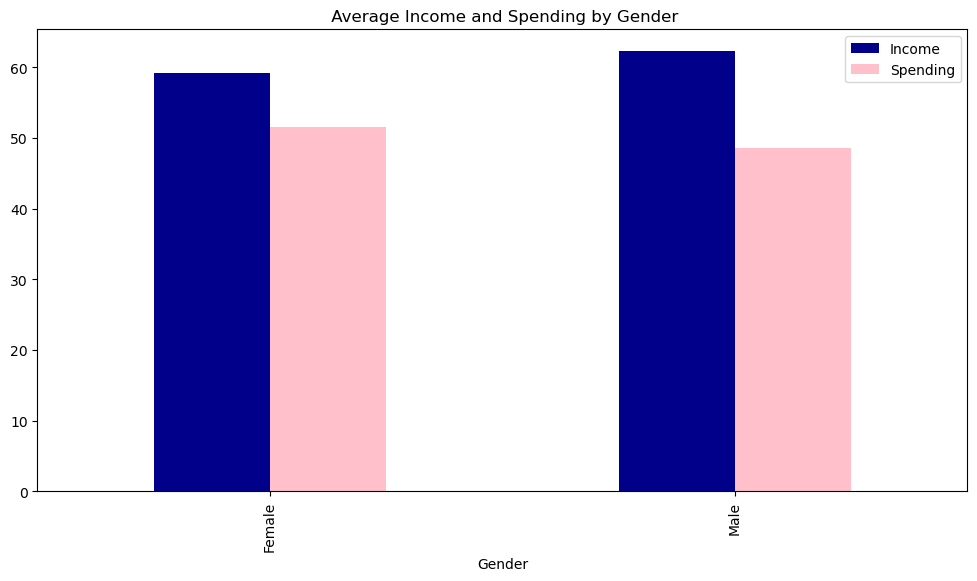

In [10]:
df1_grouped_by_gender =df1.groupby(['Gender']).mean()
df1_grouped_by_gender.loc[:,['Income','Spending']].plot(color = ('darkblue', 'pink'), kind='bar', title=" Average Income and Spending by Gender", figsize=(12,6))

<AxesSubplot:title={'center':'Ratio of Income to Spending Amount'}, xlabel='Gender'>

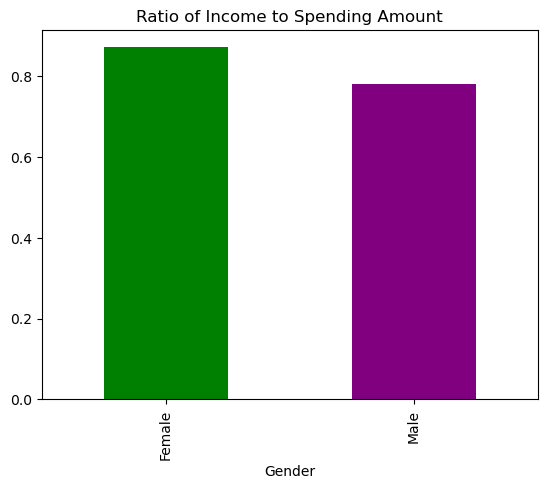

In [11]:
(df1_grouped_by_gender['Spending']/df1_grouped_by_gender['Income']).plot.bar(color = ('green', 'purple'), title = 'Ratio of Income to Spending Amount')

Text(0.5, 1.0, 'Distribution of Spending Score')

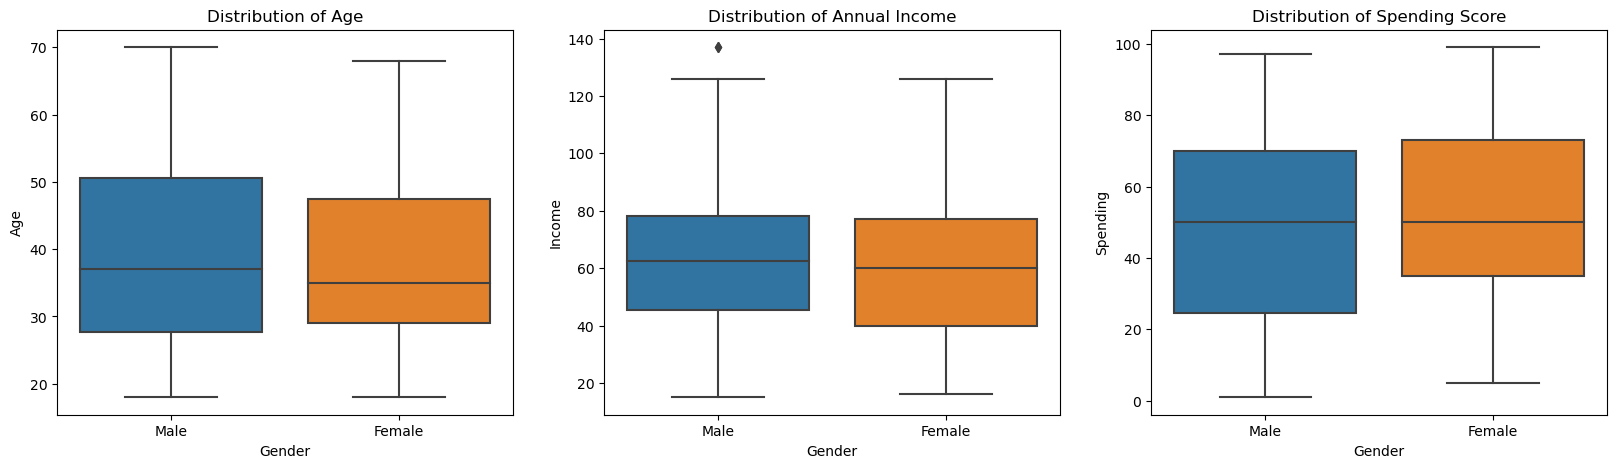

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=df1.Gender, y=df1.Age)
plt.title('Distribution of Age')

plt.subplot(1,3,2)
sns.boxplot(x=df1.Gender, y=df1.Income)
plt.title('Distribution of Annual Income')

plt.subplot(1,3,3)
sns.boxplot(x=df1.Gender, y=df1.Spending)
plt.title('Distribution of Spending Score')

<AxesSubplot:xlabel='Spending', ylabel='Density'>

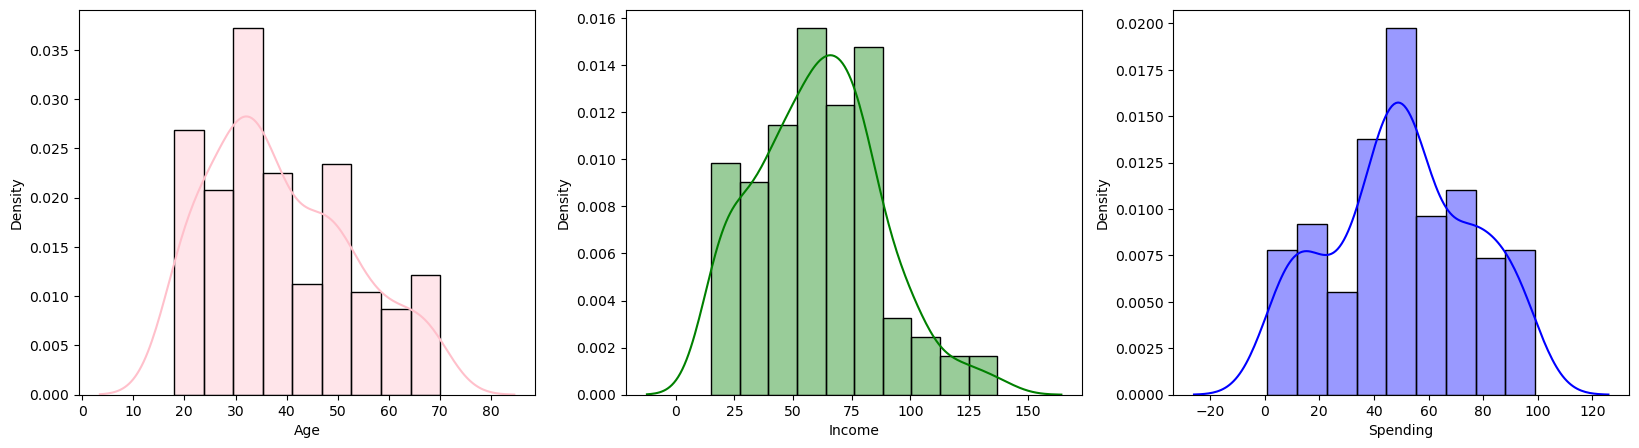

In [13]:
plt.figure(figsize=(20,5))

# Density of age
plt.subplot(1,3,1)
sns.histplot(df1['Age'], kde=True, stat="density", color = 'pink', kde_kws=dict(cut=3), alpha=.4)

# Density of ıncome
plt.subplot(1,3,2)
sns.histplot(df1['Income'], kde=True, stat="density", color = 'green', kde_kws=dict(cut=3), alpha=.4)

# Density of spending
plt.subplot(1,3,3)
sns.histplot(df1['Spending'], kde=True, stat="density", color = 'blue', kde_kws=dict(cut=3), alpha=.4)

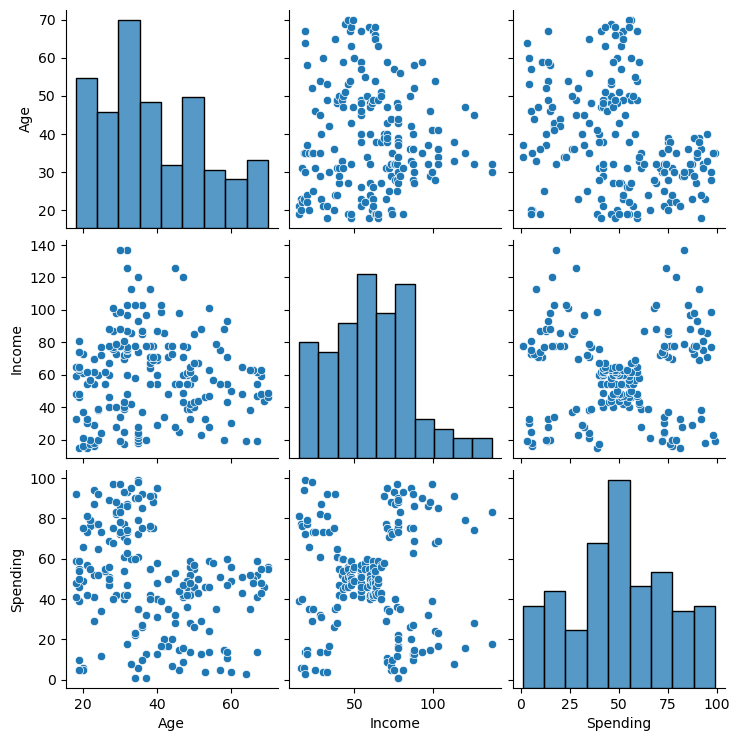

In [14]:
sns.pairplot(df1)
plt.show()

In [15]:
df1.head()

Gender  Age  Income  Spending
0    Male   19      15        39
1    Male   21      15        81
2  Female   20      16         6
3  Female   23      16        77
4  Female   31      17        40

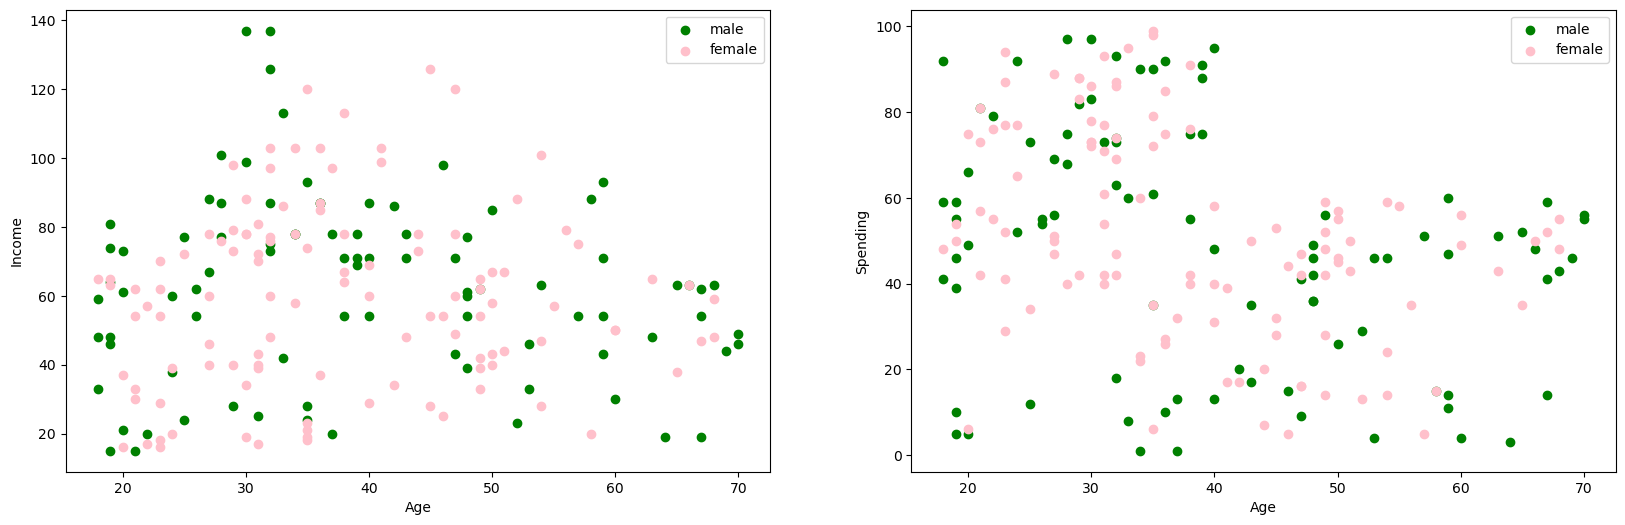

In [16]:
#Scatter plots coded for Gender
female = df1[df1.Gender == 'Female']
male = df1[df1.Gender == 'Male']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(male.Age, male.Income, color='green', label = 'male')
plt.scatter(female.Age, female.Income, color='pink', label = 'female')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(male.Age, male.Spending, color='green', label = 'male')
plt.scatter(female.Age, female.Spending, color='pink', label = 'female')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.legend()

In [17]:
#Converting gender into a metric variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])
df1.head()
#1 being male, 0 being female

Gender  Age  Income  Spending
0       1   19      15        39
1       1   21      15        81
2       0   20      16         6
3       0   23      16        77
4       0   31      17        40

<AxesSubplot:title={'center':'Correlation Matrix'}>

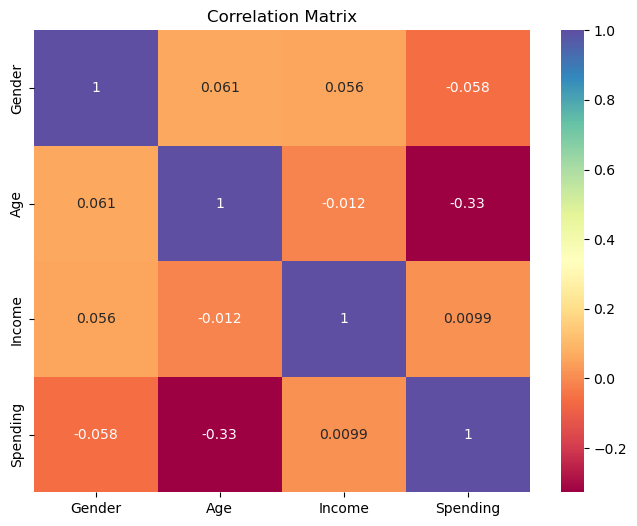

In [18]:
plt.figure(figsize=(8,6))
plt.title('Correlation Matrix')
sns.heatmap(df1.corr(), cmap = 'Spectral', annot=True)

# K-Means Clustering

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [20]:
std_scaler = StandardScaler()
std_scaler.fit(df1)
df1_scaled = std_scaler.transform(df1)

Text(0, 0.5, 'Cumulative explained variance')

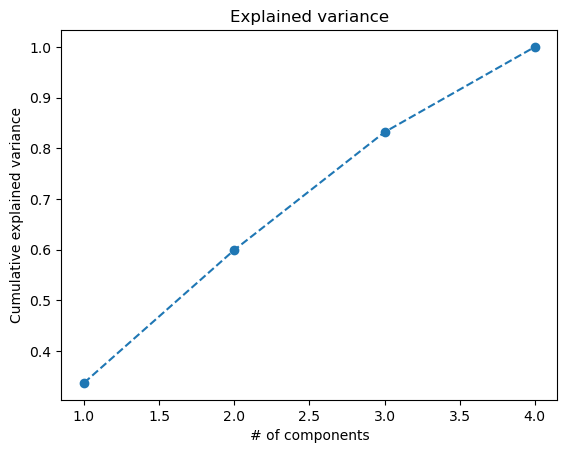

In [21]:
pca = PCA()
pca.fit(df1_scaled)

plt.plot(range(1, len(df1.columns)+1), 
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--'
        )
plt.title("Explained variance")
plt.xlabel("# of components")
plt.ylabel("Cumulative explained variance")

In [22]:
#Setting up X as the Income and Spending Score columns
X = df1.iloc[:, [2,3]].values

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


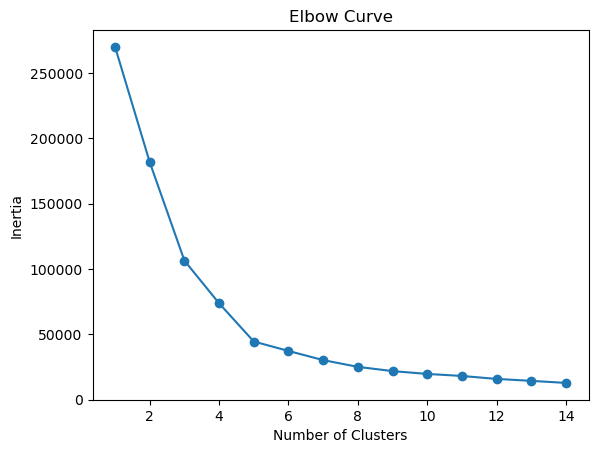

In [23]:
# Finding the best number of clusters with Elbow Rule 
wcss = []

for each in range(1,15):
    kmeans = KMeans(n_clusters = each, init = "k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

It is observed that the curve begins to flatten at about 5 clusters, so the optimal number of clusters would be 5.

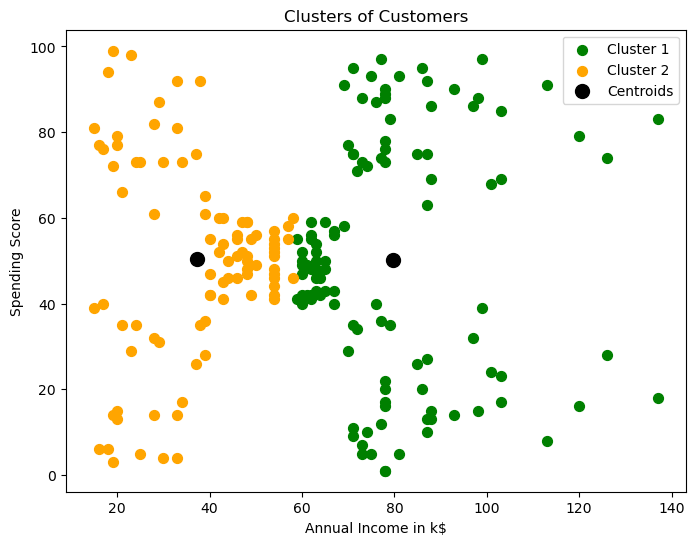

In [24]:
kmeans_2 = KMeans(n_clusters=2, init="k-means++", random_state = 0)

Y = kmeans_2.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='orange', label='Cluster 2')

#Plotting the centroids
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')


plt.title('Clusters of Customers')
plt.xlabel('Annual Income in k$')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

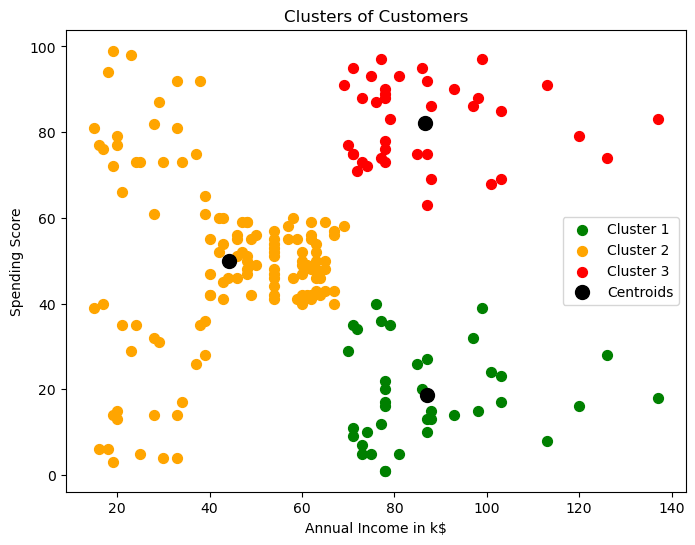

In [25]:
kmeans_2 = KMeans(n_clusters=3, init="k-means++", random_state = 0)

Y = kmeans_2.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='orange', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='red', label='Cluster 3')


#Plotting the centroids
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')


plt.title('Clusters of Customers')
plt.xlabel('Annual Income in k$')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

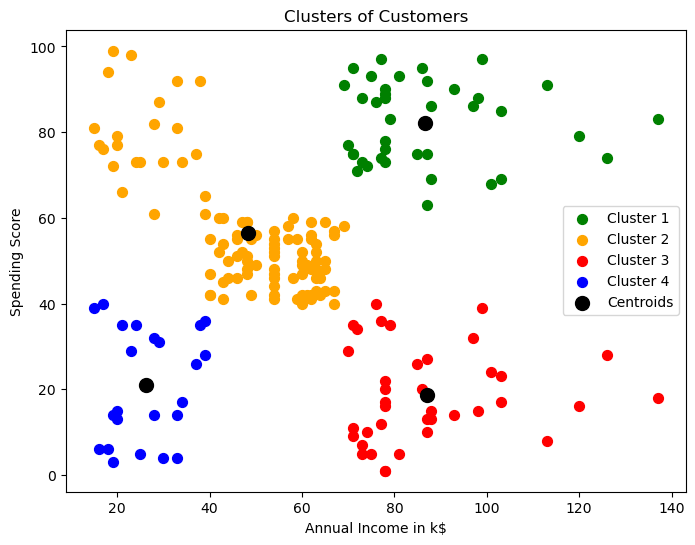

In [26]:
kmeans_2 = KMeans(n_clusters=4, init="k-means++", random_state = 0)

Y = kmeans_2.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='orange', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')

#Plotting the centroids
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')


plt.title('Clusters of Customers')
plt.xlabel('Annual Income in k$')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

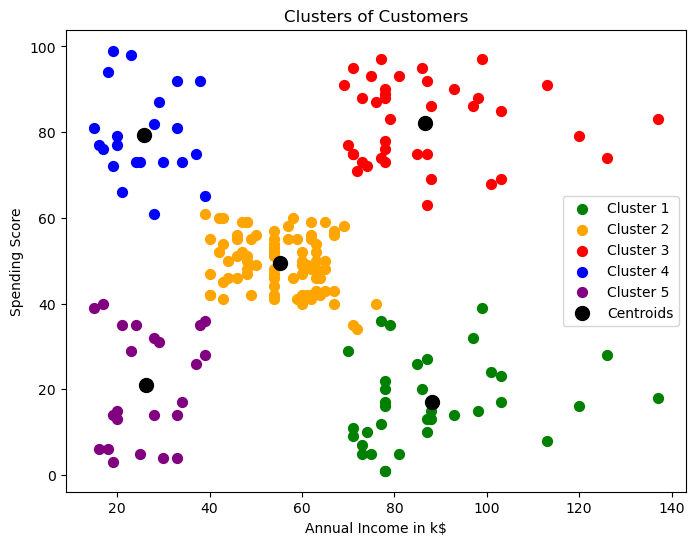

In [27]:
kmeans_2 = KMeans(n_clusters=5, init="k-means++", random_state = 0)

Y = kmeans_2.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='orange', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='purple', label='Cluster 5')

#Plotting the centroids
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')


plt.title('Clusters of Customers')
plt.xlabel('Annual Income in k$')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Presenting results of clustering

In [28]:
df1['label'] = Y
df1.head()

Gender  Age  Income  Spending  label
0       1   19      15        39      4
1       1   21      15        81      3
2       0   20      16         6      4
3       0   23      16        77      3
4       0   31      17        40      4

In [29]:
df1_clustered = df1.copy()
df1_clustered['Cluster']=  [f'Segment {i + 1}' for i in  df1.label]
df1_clustered.head()

Gender  Age  Income  Spending  label    Cluster
0       1   19      15        39      4  Segment 5
1       1   21      15        81      3  Segment 4
2       0   20      16         6      4  Segment 5
3       0   23      16        77      3  Segment 4
4       0   31      17        40      4  Segment 5

<AxesSubplot:xlabel='Cluster'>

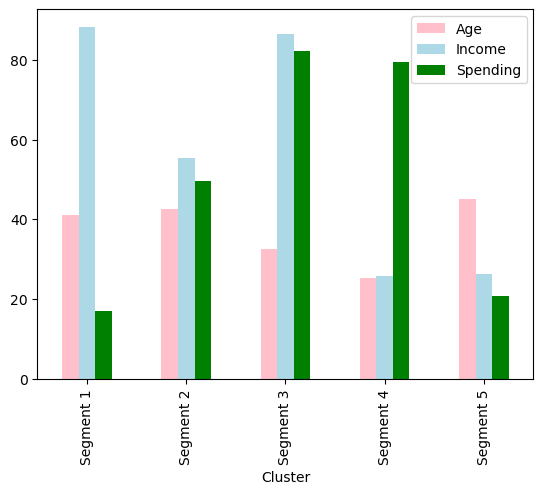

In [30]:
grouped_cluster_data = df1_clustered.groupby(['Cluster']).mean()
grouped_cluster_data.drop(['Gender', 'label'], axis = 1).plot.bar(color = ('pink', 'lightblue', 'green'))

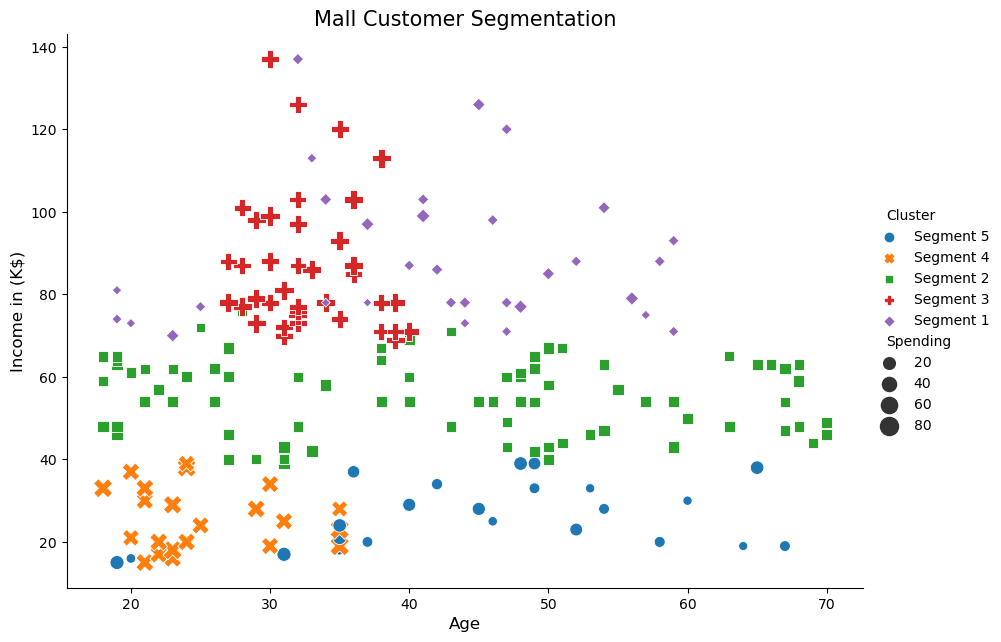

In [31]:
b =sns.relplot(
    data = df1_clustered,
    x = "Age", y="Income",
    hue = "Cluster", style= "Cluster", size = "Spending", aspect = 11.7/8.27, height=6.27, sizes = (40, 200)

)

plt.xlabel('Age', fontsize=12);
plt.ylabel('Income in (K$)', fontsize=12);
plt.title( "Mall Customer Segmentation", fontsize=15)
plt.show()


array([<AxesSubplot:ylabel='Spending'>], dtype=object)

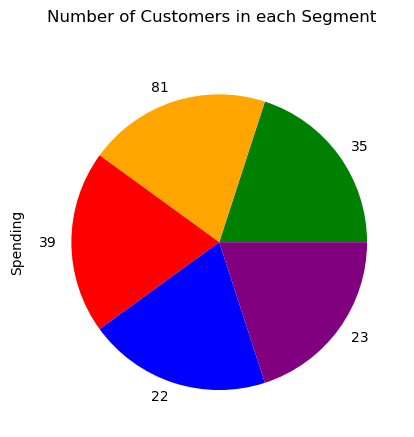

In [32]:
df1_clustered.groupby(['Cluster']).count().loc[:,'Spending'].value_counts().plot.pie(title = "Number of Customers in each Segment", colors = ('green', 'orange', 'red', 'blue', 'purple'), subplots = True)

# XG Boosting

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold,train_test_split
from sklearn.metrics import mean_squared_error,r2_score

from numpy import absolute

from xgboost import XGBRegressor

In [34]:
df1.drop(['label'], axis = 1, inplace = True)
df1.head()

Gender  Age  Income  Spending
0       1   19      15        39
1       1   21      15        81
2       0   20      16         6
3       0   23      16        77
4       0   31      17        40

In [35]:
df1_clustered2 = df1.copy()
df1_clustered2['cl']=  kmeans_2.labels_
df1_clustered2.head()

Gender  Age  Income  Spending  cl
0       1   19      15        39   4
1       1   21      15        81   3
2       0   20      16         6   4
3       0   23      16        77   3
4       0   31      17        40   4

In [36]:
# splitting data into input and output columns
X, y = df1.drop(['Spending'],axis=1), df1.loc[:,'Spending']
X2, y2 = df1_clustered2.drop(['Spending'],axis=1) , df1_clustered2.loc[:,'Spending']


model = XGBRegressor()
model2 = XGBRegressor()

# model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluating model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# forcing scores to be positive
scores = absolute(scores)
print('Mean MAE Of the Model Without Clustering: %.3f (%.3f)' % (scores.mean(), scores.std()),'\n' )


# evaluate model 2
scores2 = cross_val_score(model2, X2, y2, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# forcing scores to be positive
scores2 = absolute(scores2)
print('Mean MAE Of the Model With Clustering: %.3f (%.3f)' % (scores2.mean(), scores2.std()), '\n' )

Mean MAE Of the Model Without Clustering: 17.207 (3.940) 

Mean MAE Of the Model With Clustering: 9.293 (1.362) 



The MAE has improved tremendously from the effect of clustering.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
model2.fit(X2_train, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [38]:
y_pred = model.predict(X_test)
y2_pred = model2.predict(X2_test)

print("Mean Square Error Without Clustering:",mean_squared_error(y_pred, y_test))
print("Mean Square Error With Clustering:",mean_squared_error(y2_pred, y2_test))

print("R2 Score Without Clustering:",r2_score(y_pred, y_test))
print("R2 Score With Clustering:",r2_score(y2_pred, y2_test))

Mean Square Error Without Clustering: 422.43471769033397
Mean Square Error With Clustering: 171.75868479552344
R2 Score Without Clustering: 0.14178858723608834
R2 Score With Clustering: 0.7812326856466469


The MAE and R2 scores have both improved tremendously due to the clustering.

# Task 2- Regression

Dataset access link: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df2 = pd.read_csv("C:/Users/HP/OneDrive/Documents/RIC/Machine Learning/Coursework/Regression/insurance.csv")

In [41]:
df2.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [42]:
df2.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory Data Analysis

Text(0, 0.5, 'Count')

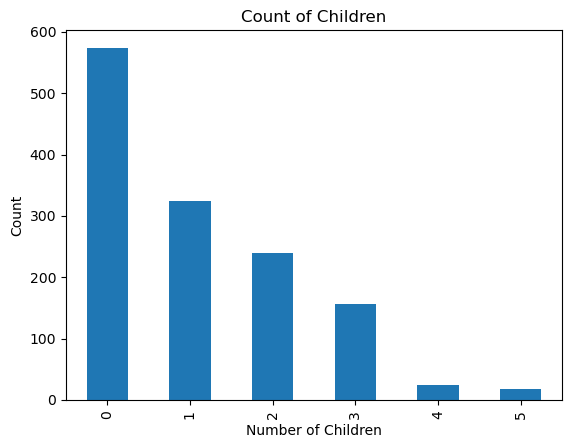

In [43]:
df2['children'].value_counts().plot(kind='bar')

plt.title('Count of Children', fontsize=12)
plt.xlabel('Number of Children', fontsize=10)
plt.ylabel('Count', fontsize=10)

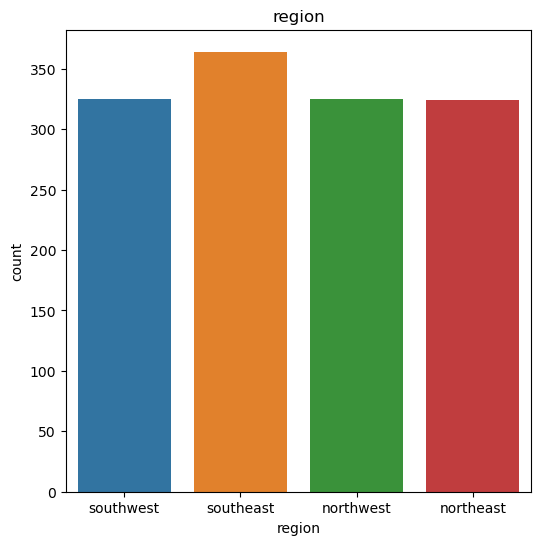

In [44]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df2)
plt.title('region')
plt.show()

Text(0, 0.5, 'Charges')

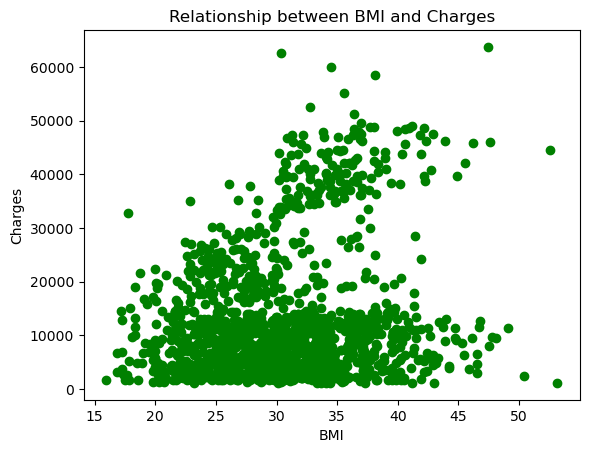

In [45]:
plt.scatter(df2['bmi'], df2['charges'], color = 'green')

plt.title('Relationship between BMI and Charges', fontsize=12)
plt.xlabel('BMI', fontsize=10)
plt.ylabel('Charges', fontsize=10)

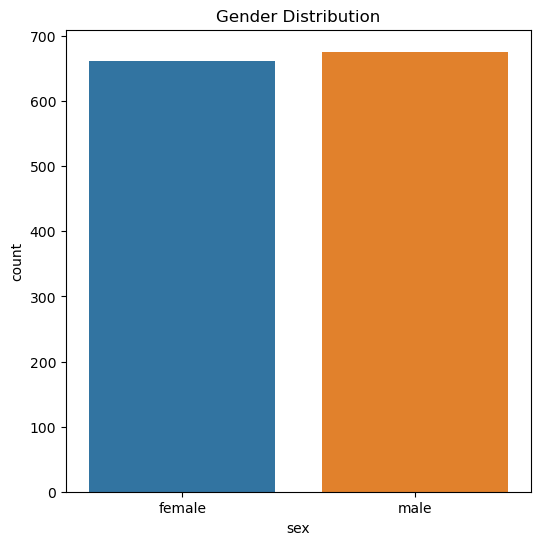

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df2)
plt.title('Gender Distribution')
plt.show()

<AxesSubplot:title={'center':'Gender Distibution'}, ylabel='age'>

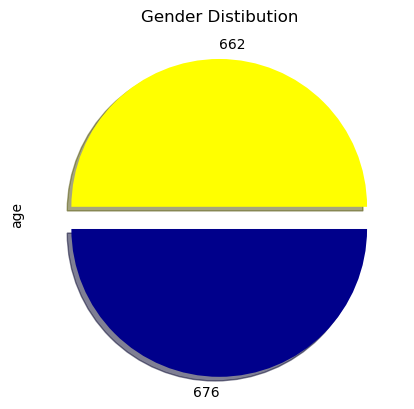

In [47]:
col= ['yellow','darkblue']
df2.groupby(['sex']).count().loc[:,'age'].value_counts().plot.pie(title = "Gender Distibution", colors = col, ylabel = None, explode = [0.05,0.1], shadow=True)

Text(0.5, 1.0, 'BMI Distribution')

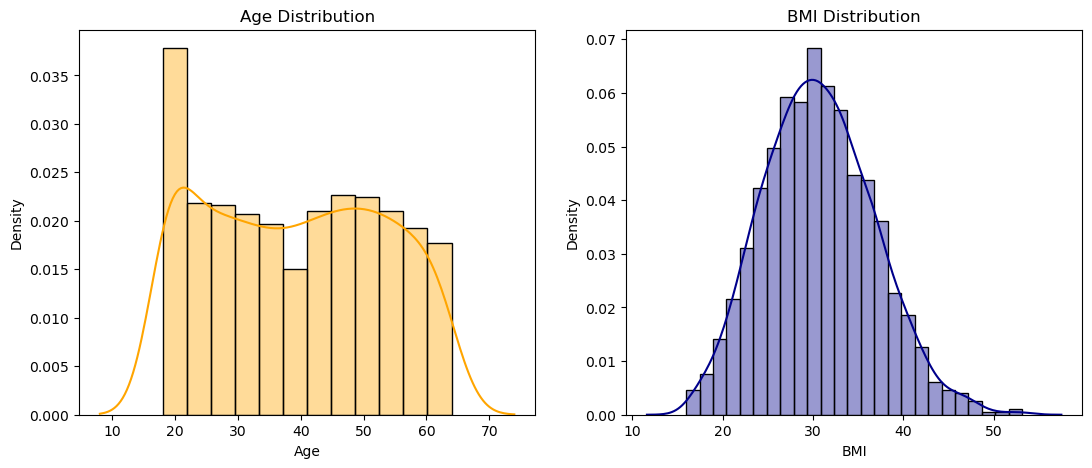

In [48]:
plt.figure(figsize=(20,5))

# Density of age
plt.subplot(1,3,1)
sns.histplot(df2['age'],kde=True,stat="density", color = 'orange', kde_kws=dict(cut=3), alpha=.4)
plt.xlabel("Age")
plt.title("Age Distribution")

# Density of ıncome
plt.subplot(1,3,2)
sns.histplot(df2['bmi'],kde=True,stat="density", color = 'darkblue', kde_kws=dict(cut=3), alpha=.4)
plt.xlabel("BMI")
plt.title("BMI Distribution")

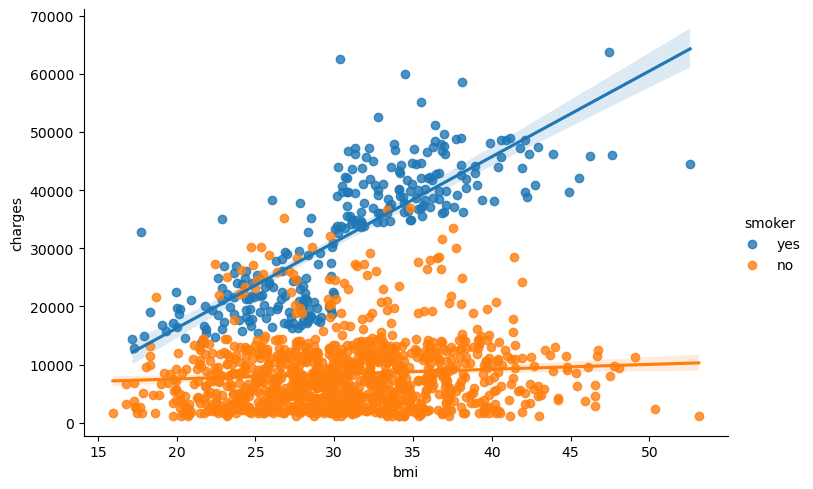

In [49]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df2, aspect=1.5, height=5)

#The graph shows that there is a positive relationship between smoking and charges. A person who smokes is relatively charged higher for insurance.

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [51]:
#converting the sex, smoker and region columns into numerical values
le_sex = LabelEncoder()
le_smoker = LabelEncoder()

le_sex.fit(df2.sex.drop_duplicates())
le_smoker.fit(df2.smoker.drop_duplicates())

df2['sex_male'] = le_sex.transform(df2.sex)
df2['smoker_yes'] = le_smoker.transform(df2.smoker)

In [52]:
ct = ColumnTransformer(
    [('ohe', OneHotEncoder(), ['region'])],
    remainder='passthrough'
)

In [53]:
transformed = ct.fit_transform(df2)

df2 = pd.DataFrame(transformed,
                  columns = ct.get_feature_names_out())

In [54]:
df2.columns = ['region_northeast','region_northwest','region_southeast','region_southwest','age','sex','bmi','children','smoker','charges','sex_male','smoker_yes']

In [55]:
df2 = df2[['age', 'sex', 'sex_male', 'bmi', 'children', 'smoker', 'smoker_yes', 'region_northeast','region_northwest','region_southeast','region_southwest', 'charges' ]]

In [56]:
df2.head()

age     sex sex_male     bmi children smoker smoker_yes region_northeast  \
0  19  female        0    27.9        0    yes          1              0.0   
1  18    male        1   33.77        1     no          0              0.0   
2  28    male        1    33.0        3     no          0              0.0   
3  33    male        1  22.705        0     no          0              0.0   
4  32    male        1   28.88        0     no          0              0.0   

  region_northwest region_southeast region_southwest      charges  
0              0.0              0.0              1.0    16884.924  
1              0.0              1.0              0.0    1725.5523  
2              0.0              1.0              0.0     4449.462  
3              1.0              0.0              0.0  21984.47061  
4              1.0              0.0              0.0    3866.8552

In [57]:
df2_encoded = df2[['age','sex_male', 'bmi', 'children', 'smoker_yes', 'region_northeast','region_northwest','region_southeast','region_southwest', 'charges' ]]
df2_encoded = df2_encoded.apply(pd.to_numeric)

In [58]:
df2_encoded.head()

age  sex_male     bmi  children  smoker_yes  region_northeast  \
0   19         0  27.900         0           1               0.0   
1   18         1  33.770         1           0               0.0   
2   28         1  33.000         3           0               0.0   
3   33         1  22.705         0           0               0.0   
4   32         1  28.880         0           0               0.0   

   region_northwest  region_southeast  region_southwest      charges  
0               0.0               0.0               1.0  16884.92400  
1               0.0               1.0               0.0   1725.55230  
2               0.0               1.0               0.0   4449.46200  
3               1.0               0.0               0.0  21984.47061  
4               1.0               0.0               0.0   3866.85520

In [59]:
df2_encoded.shape

(1338, 10)

In [60]:
df2_encoded.describe()

age     sex_male          bmi     children   smoker_yes  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

       region_northeast  region_northwest  region_southeast  region_southwest  \
count       1338.000000       1338.000000       1338.000000       1338.000000   
mean           0.242152          0.242900          0.272048          0.242900   
std            0.428546          0.428995          0.445181          0.428995   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          1.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

            charges  
count   1338.000000  
mean   13270.422265  
std    12110.011237  
min     1121.873900  
25%     4740.287150  
50%     9382.033000  
75%    16639.912515  
max    63770.428010

In [61]:
df2_encoded.dtypes

age                   int64
sex_male              int64
bmi                 float64
children              int64
smoker_yes            int64
region_northeast    float64
region_northwest    float64
region_southeast    float64
region_southwest    float64
charges             float64
dtype: object

In [62]:
df2_corr = df2_encoded[['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'charges']].corr(method = 'pearson')
df2_corr.head()

age  sex_male       bmi  children  smoker_yes   charges
age         1.000000 -0.020856  0.109272  0.042469   -0.025019  0.299008
sex_male   -0.020856  1.000000  0.046371  0.017163    0.076185  0.057292
bmi         0.109272  0.046371  1.000000  0.012759    0.003750  0.198341
children    0.042469  0.017163  0.012759  1.000000    0.007673  0.067998
smoker_yes -0.025019  0.076185  0.003750  0.007673    1.000000  0.787251

In [63]:
import plotly.express as px
import plotly.graph_objects as go

Text(318.0815972222224, 0.5, 'Features')

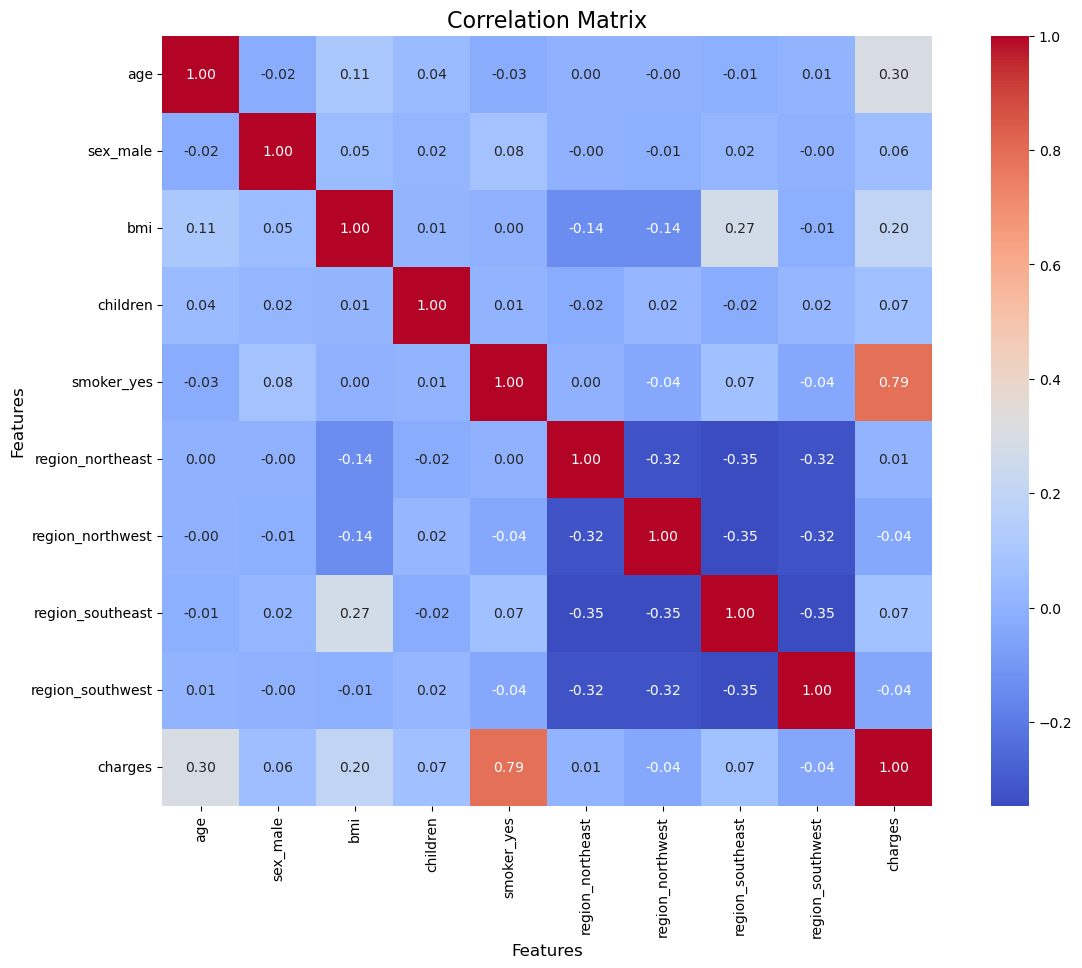

In [64]:
# Plotting a Heatmap to see in depth correlation 
corrmatrix = df2_encoded.corr()  #Defining a correlation variable 
plt.figure(figsize=(15,10))   
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True)

plt.title('Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

In [65]:
#Finding correlation of each variable with charges
df2 = df2_encoded
df2b = df2.drop(columns = 'charges') #Removing the charges variable
corr = df2b.corrwith(df2['charges'])

In [66]:
df2.head()

age  sex_male     bmi  children  smoker_yes  region_northeast  \
0   19         0  27.900         0           1               0.0   
1   18         1  33.770         1           0               0.0   
2   28         1  33.000         3           0               0.0   
3   33         1  22.705         0           0               0.0   
4   32         1  28.880         0           0               0.0   

   region_northwest  region_southeast  region_southwest      charges  
0               0.0               0.0               1.0  16884.92400  
1               0.0               1.0               0.0   1725.55230  
2               0.0               1.0               0.0   4449.46200  
3               1.0               0.0               0.0  21984.47061  
4               1.0               0.0               0.0   3866.85520

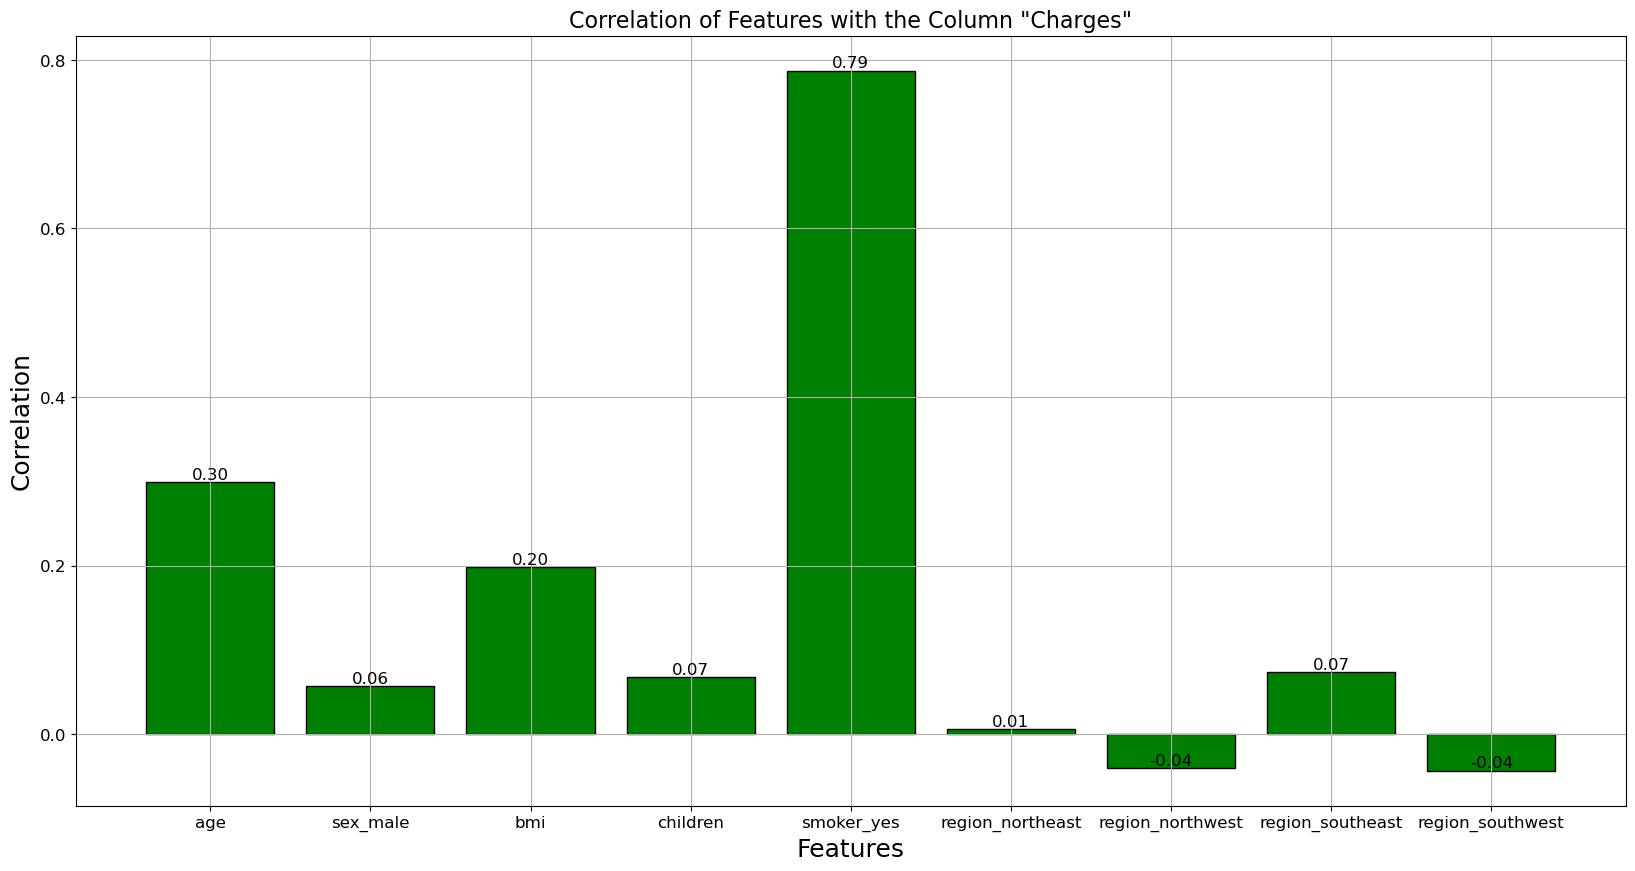

In [67]:
plt.figure(figsize=(20,10))
plt.bar(corr.index, corr.values, color = 'green', edgecolor = 'black')

plt.title('Correlation of Features with the Column "Charges"', fontsize=16)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

for i, value in enumerate(corr.values):
    label = f"{value:.2f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=12)

plt.show()

## Impact of smoking

It is observed that a strong positive correlation is found between smoking and charges. Therefore, this will be investigated in more detail.

In [68]:
import matplotlib.pyplot as pl

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

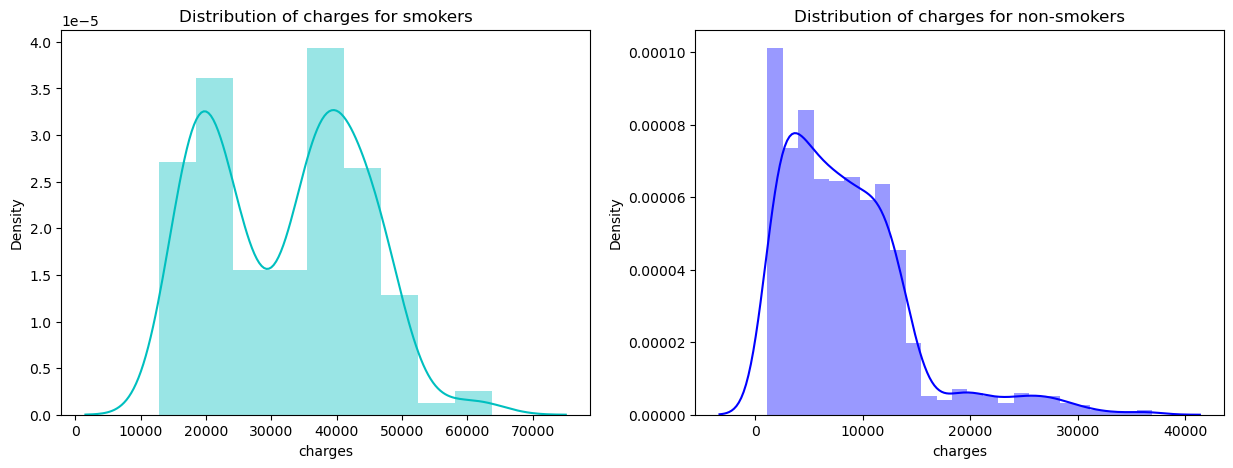

In [69]:
fig = pl.figure(figsize=(15,5))

ax = fig.add_subplot(121)
sns.distplot(df2[(df2.smoker_yes == 1)]["charges"], color='c', ax = ax )
ax.set_title('Distribution of charges for smokers')

ax = fig.add_subplot(122)
sns.distplot(df2[(df2.smoker_yes == 0)]['charges'], color='b', ax = ax)
ax.set_title('Distribution of charges for non-smokers')

Text(0.5, 1.0, 'Smoking vs. Charges')

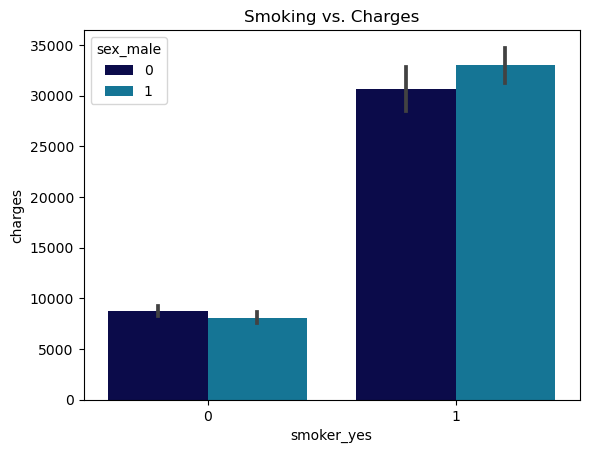

In [70]:
sns.barplot(x = 'smoker_yes', y='charges', hue = 'sex_male', data=df2, palette = 'ocean')
plt.title('Smoking vs. Charges')

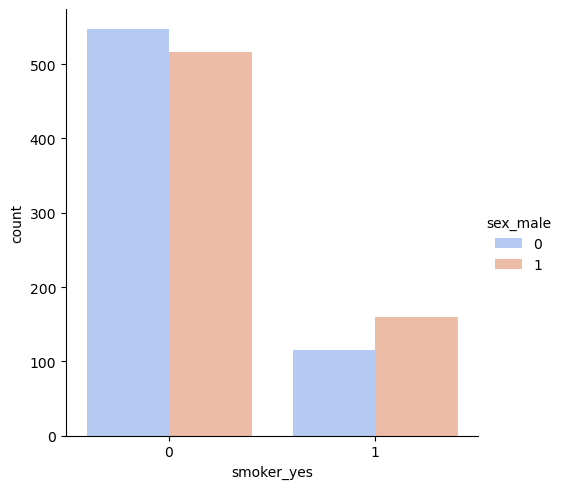

In [71]:
sns.catplot(x = "smoker_yes", kind = "count", hue = 'sex_male', palette = "coolwarm", data=df2)

There are more non-smokers than smokers, as well as more female non-smokers than male non-smokers. There are also more male smokers than female smokers. Therefore, it is likely that treatment for males would be more costly than for females.

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker_yes'>

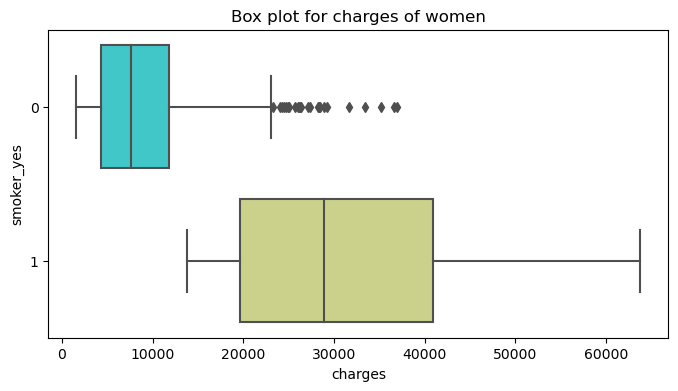

In [72]:
pl.figure(figsize=(8,4))
pl.title("Box plot for charges of women")
sns.boxplot(y = "smoker_yes", x = 'charges', data =  df2[(df2.sex_male == 0)] , orient = "h", palette = 'rainbow')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker_yes'>

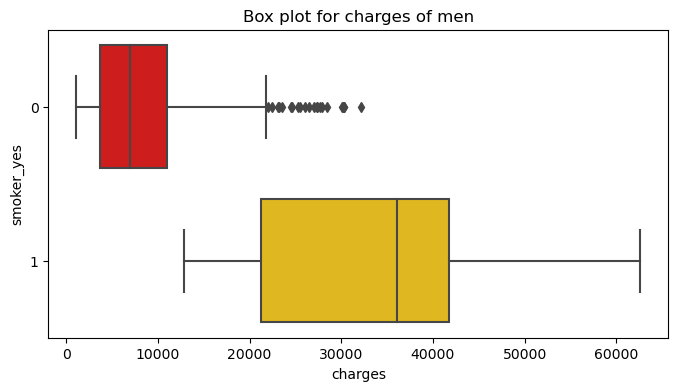

In [73]:
pl.figure(figsize=(8,4))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker_yes", x="charges", data =  df2[(df2.sex_male == 1)] , orient="h", palette = 'hot')

## Impact of Age

Text(0.5, 1.0, 'Age vs. Charges')

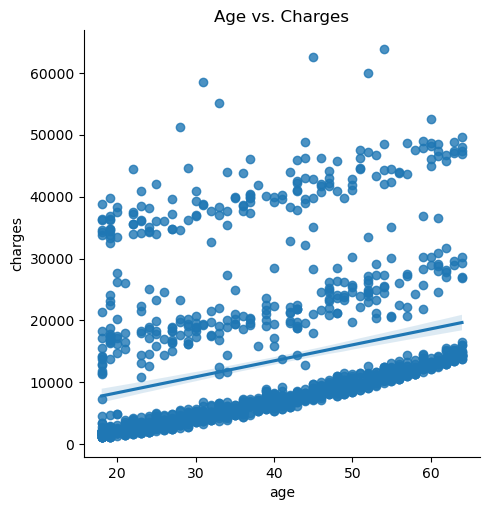

In [74]:
sns.lmplot(x='age',y='charges', data=df2)
plt.title('Age vs. Charges')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for patients aged below 30')

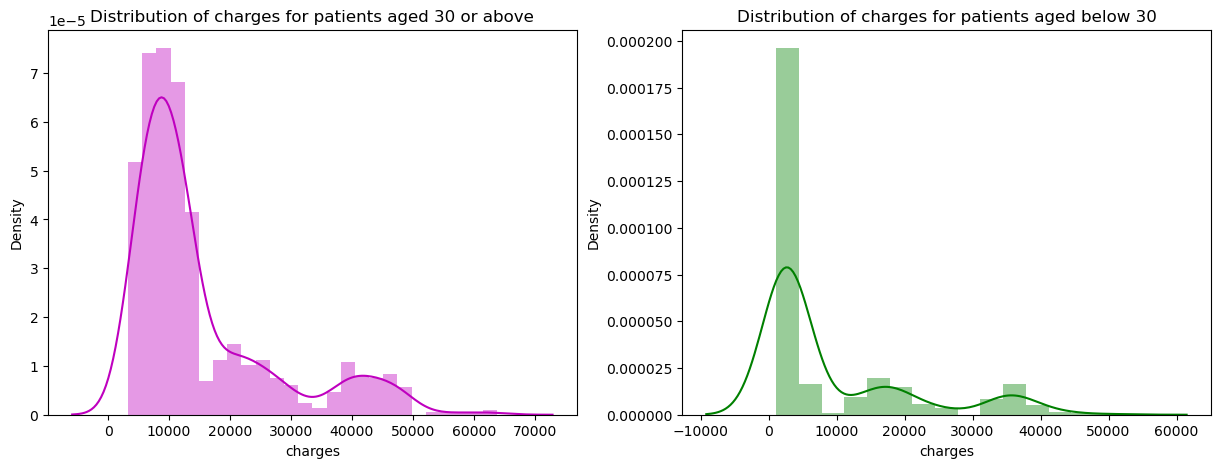

In [75]:
fig = pl.figure(figsize=(15,5))

ax = fig.add_subplot(121)
sns.distplot(df2[(df2.age >= 30)]["charges"], color='m', ax = ax )
ax.set_title('Distribution of charges for patients aged 30 or above')

ax = fig.add_subplot(122)
sns.distplot(df2[(df2.age < 30)]['charges'], color='g', ax = ax)
ax.set_title('Distribution of charges for patients aged below 30')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for patients aged below 40')

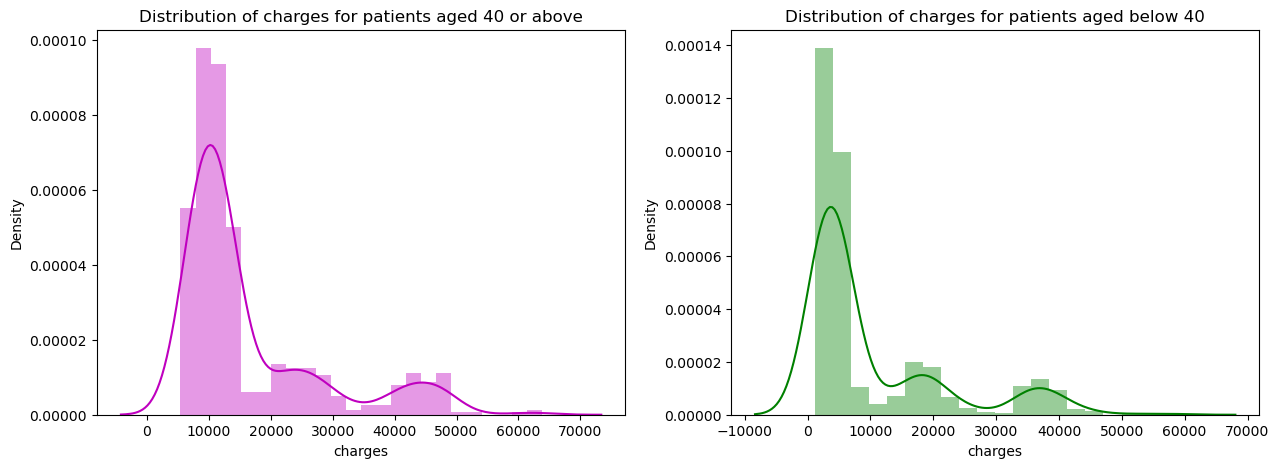

In [76]:
fig = pl.figure(figsize=(15,5))

ax = fig.add_subplot(121)
sns.distplot(df2[(df2.age >= 40)]["charges"], color='m', ax = ax )
ax.set_title('Distribution of charges for patients aged 40 or above')

ax = fig.add_subplot(122)
sns.distplot(df2[(df2.age < 40)]['charges'], color='g', ax = ax)
ax.set_title('Distribution of charges for patients aged below 40')

## Impact of BMI

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for patients with BMI less than 30')

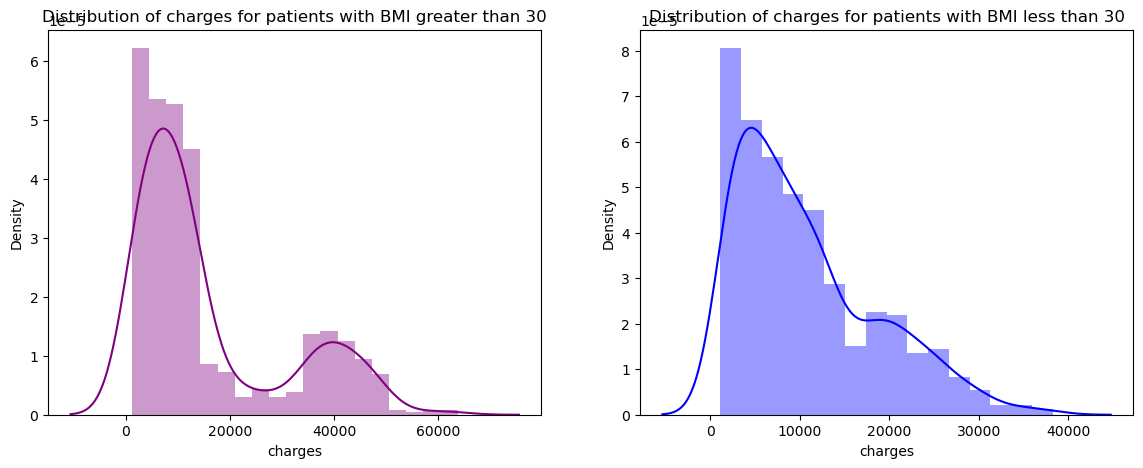

In [77]:
fig = pl.figure(figsize=(14,5))

ax = fig.add_subplot(121)
sns.distplot(df2[(df2.bmi >= 30)]['charges'], color = 'purple')
ax.set_title("Distribution of charges for patients with BMI greater than 30")

ax = fig.add_subplot(122)
sns.distplot(df2[(df2.bmi < 30)]['charges'], color = 'blue')
ax.set_title("Distribution of charges for patients with BMI less than 30")

# Finding the best models

In [78]:
from time import time
from sklearn import datasets, metrics, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
X = df2.drop(columns='charges', axis = 1)
y = df2['charges']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    XGBRegressor()
]

In [82]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.430s
	Prediction time: 0.093s
	Explained variance: 0.25455996657821234
	Mean absolute error: 7500.75364725
	R2 score: 0.24571206601378226

GradientBoostingRegressor()
	Training time: 0.359s
	Prediction time: 0.003s
	Explained variance: 0.897385283961081
	Mean absolute error: 2452.5567162093303
	R2 score: 0.8966017795504925

RandomForestRegressor()
	Training time: 0.261s
	Prediction time: 0.016s
	Explained variance: 0.8851669084270463
	Mean absolute error: 2606.17936310342
	R2 score: 0.8808326887488284

DecisionTreeRegressor()
	Training time: 0.005s
	Prediction time: 0.001s
	Explained variance: 0.7081794481846788
	Mean absolute error: 3328.1264739141793
	R2 score: 0.699036762121831

LinearRegression()
	Training time: 3.004s
	Prediction time: 0.003s
	Explained variance: 0.8002657348677409
	Mean absolute error: 3933.272649405236
	R2 score: 0.7999876970680433

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=

From the results above, it can be seen that GradientBoostingRegressor, RandomForestRegressor, XGBRegressor and LinearRegression are the best fit models for this data, so these will be explored further.

# Gradient Boosting Regressor

## Hyperparameter Tuning

### GridSearch

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [84]:
parameters = { 'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [85]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters)
model = grid.fit(X, y)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1854: FutureWarning: criterion='mae' was deprecated

{'criterion': 'squared_error', 'learning_rate': 0.05, 'loss': 'squared_error', 'max_features': 'auto'} 

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.05,
                          max_features='auto') 



In [86]:
{'criterion': 'friedman_mse', 'learning_rate': 0.25, 'loss': 'absolute_error', 'max_features': 'sqrt'} 

GradientBoostingRegressor(learning_rate=0.25, loss='absolute_error', max_features='sqrt') 

GradientBoostingRegressor(learning_rate=0.25, loss='absolute_error',
                          max_features='sqrt')

In [91]:
grad_boost = GradientBoostingRegressor(learning_rate=0.25, loss='absolute_error', criterion = 'friedman_mse', max_depth = 3, max_features='sqrt')
grad_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.25, loss='absolute_error',
                          max_features='sqrt')

In [93]:
pred = grad_boost.predict(X_test)
#Testing the model accuracy with different parameters
r2   = r2_score(y_test, pred)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_test, pred)  # Getting the Mean Absolute Error
mse  = mean_squared_error(y_test, pred)   # Getting the Mean Squared Error
rmse = np.sqrt(mse)                       # Getting the Root Mean Squared Error
exp  = explained_variance_score(y_test, pred)

#Defining a DataFrame 
results = pd.DataFrame([['Gradient Boosting Regressor', r2, mae, mse, rmse, exp]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Explained Variance'])

results

Model  R-squared (R²)  Mean Absolute Error  \
0  Gradient Boosting Regressor         0.89112          1767.991172   

   Mean Squared Error  Root Mean Squared Error  Explained Variance  
0        1.732613e+07              4162.466699            0.897951

# Linear regression

In [95]:
df2.head()

age  sex_male     bmi  children  smoker_yes  region_northeast  \
0   19         0  27.900         0           1               0.0   
1   18         1  33.770         1           0               0.0   
2   28         1  33.000         3           0               0.0   
3   33         1  22.705         0           0               0.0   
4   32         1  28.880         0           0               0.0   

   region_northwest  region_southeast  region_southwest      charges  
0               0.0               0.0               1.0  16884.92400  
1               0.0               1.0               0.0   1725.55230  
2               0.0               1.0               0.0   4449.46200  
3               1.0               0.0               0.0  21984.47061  
4               1.0               0.0               0.0   3866.85520

In [96]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression()

In [97]:
# Prediction on training data
from sklearn.metrics import r2_score
print ('Training Score', r2_score(y_train, regression_model.predict(X_train)))

Training Score 0.7370262574551634


In [98]:
print ('Test Score', r2_score(y_test, regression_model.predict(X_test)))

Test Score 0.7999876970680433


In [99]:
pred = regression_model.predict(X_test)
#Testing the model accuracy with different parameters
r2   = r2_score(y_test, pred)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_test, pred)  # Getting the Mean Absolute Error
mse  = mean_squared_error(y_test, pred)   # Getting the Mean Squared Error
rmse = np.sqrt(mse)                       # Getting the Root Mean Squared Error
exp  = explained_variance_score(y_test, pred)


#Defining a DataFrame 
results = pd.DataFrame([['Linear Regression', r2, mae, mse, rmse, exp]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Explained Variance Score'])

results

Model  R-squared (R²)  Mean Absolute Error  Mean Squared Error  \
0  Linear Regression        0.799988          3933.272649        3.182795e+07   

   Root Mean Squared Error  Explained Variance Score  
0              5641.626559                  0.800266

# XGBRegressor

In [100]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [101]:
pred = xgb.predict(X_test)
#Testing the model accuracy with different parameters
r2   = r2_score(y_test, pred)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_test, pred)  # Getting the Mean Absolute Error
mse  = mean_squared_error(y_test, pred)   # Getting the Mean Squared Error
rmse = np.sqrt(mse)                       # Getting the Root Mean Squared Error
exp  = explained_variance_score(y_test, pred)


#Defining a DataFrame 
results = pd.DataFrame([['XGB Regressor', r2, mae, mse, rmse, exp]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Explained Variance Score'])

results

Model  R-squared (R²)  Mean Absolute Error  Mean Squared Error  \
0  XGB Regressor        0.847856          2960.020327        2.421066e+07   

   Root Mean Squared Error  Explained Variance Score  
0              4920.432937                  0.850552

# Random Forest Regressor

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

In [103]:
model_params = {
    'n_estimators': randint(10,500),
    'max_features': truncnorm(a=0, b=1, loc=0.5, scale=0.1),
    'min_samples_split': uniform(0.05, 0.2)  
}

In [104]:
rf_model = RandomForestRegressor()

clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1)

model = clf.fit(X, y)

In [105]:
print(model.best_estimator_.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.5561526604307352, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 0.05316424856931126, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 327, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [106]:
rf_model = RandomForestRegressor(n_estimators = 327, criterion = 'mse', random_state = None, n_jobs = None, max_depth = None)
rf_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', n_estimators=327)

In [107]:
pred = rf_model.predict(X_test)
#Testing the model accuracy with different parameters
r2   = r2_score(y_test, pred)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_test, pred)  # Getting the Mean Absolute Error
mse  = mean_squared_error(y_test, pred)   # Getting the Mean Squared Error
rmse = np.sqrt(mse)                       # Getting the Root Mean Squared Error
exp  = explained_variance_score(y_test, pred)


#Defining a DataFrame 
results = pd.DataFrame([['Random Forest Regressor', r2, mae, mse, rmse, exp]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Explained Variance Score'])

results

Model  R-squared (R²)  Mean Absolute Error  \
0  Random Forest Regressor        0.880288          2615.050963   

   Mean Squared Error  Root Mean Squared Error  Explained Variance Score  
0        1.904971e+07               4364.59691                  0.884533

## Feature selection

In [109]:
df2.columns

Index(['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges'],
      dtype='object')

In [68]:
variable_names = ['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northeast','region_northwest', 'region_southeast', 'region_southwest']

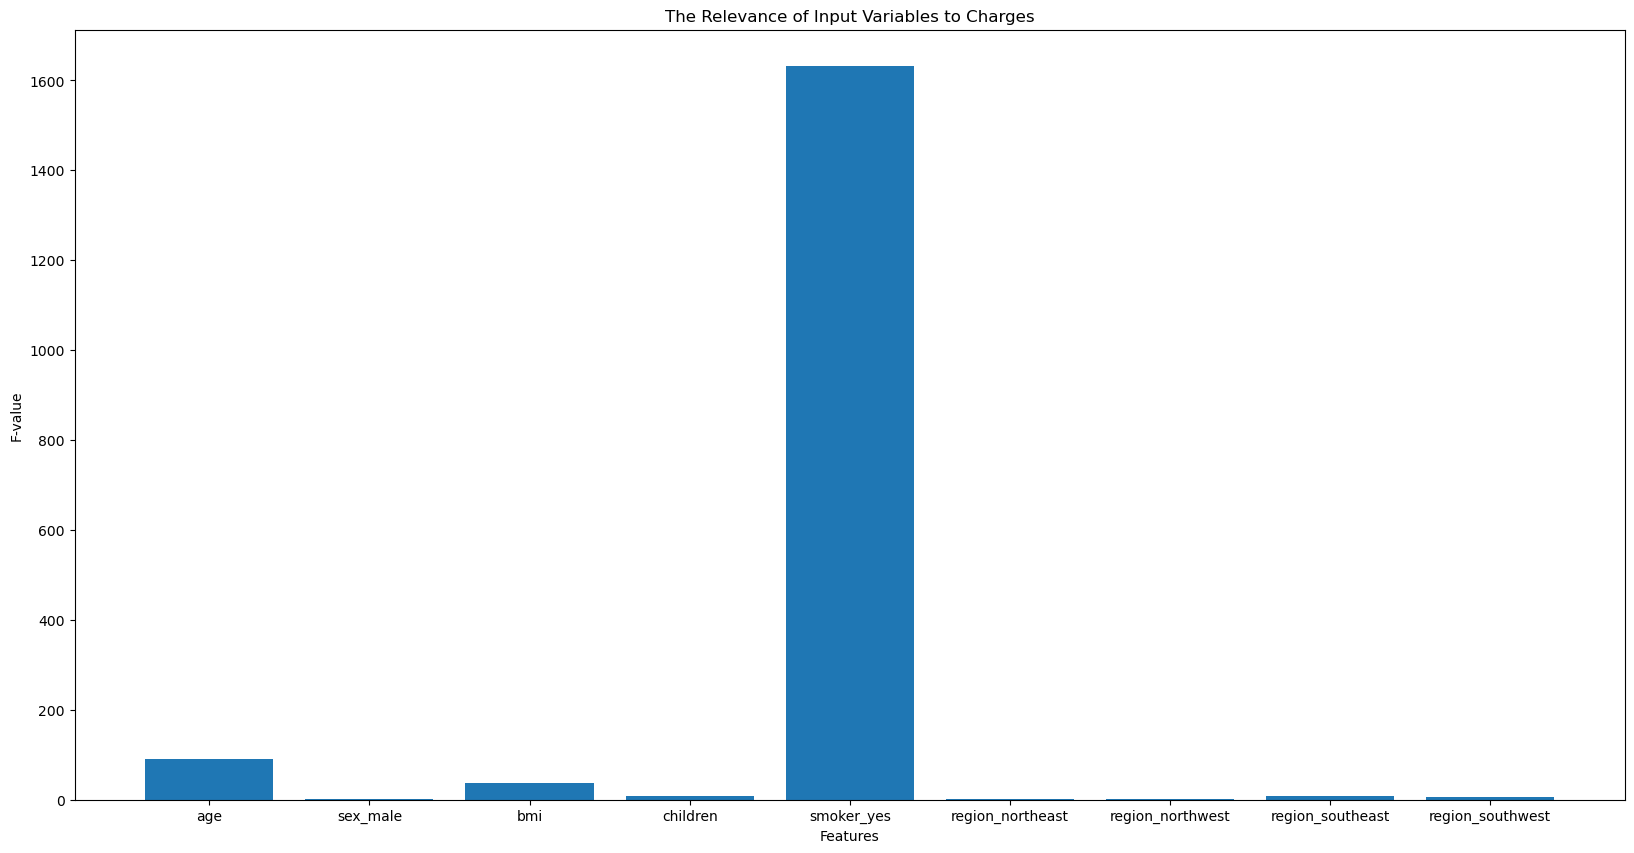

In [76]:
f_selector = SelectKBest(score_func = f_regression, k='all')
f_selector.fit(X_train, y_train)
X_train_feat = f_selector.transform(X_train)
X_test_feat = f_selector.transform(X_test)
plt.figure(figsize = (20,10))
plt.bar(variable_names, f_selector.scores_)
plt.xlabel("Features")
plt.ylabel("F-value")
plt.title("The Relevance of Input Variables to Charges")
plt.show()

In [113]:
# Linear Regression with the best 4 features found above

X2 = X[["age", "bmi", "children", "smoker_yes"]].copy()
y2 = y.copy()


X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

reg2 = LinearRegression().fit(X_train, y_train)

In [114]:
pred = reg2.predict(X_test)
#Testing the model accuracy with different parameters
r2   = r2_score(y_test, pred)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_test, pred)  # Getting the Mean Absolute Error
mse  = mean_squared_error(y_test, pred)   # Getting the Mean Squared Error
rmse = np.sqrt(mse)                       # Getting the Root Mean Squared Error
exp  = explained_variance_score(y_test, pred)


#Defining a DataFrame 
results = pd.DataFrame([['Linear Regression', r2, mae, mse, rmse, exp]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Explained Variance Score'])

results

Model  R-squared (R²)  Mean Absolute Error  Mean Squared Error  \
0  Linear Regression        0.781115          4213.798595        3.398165e+07   

   Root Mean Squared Error  Explained Variance Score  
0              5829.378522                  0.781454

### Possible alternative

In [116]:
# Applying a log transformation to the charges variable
df2 = pd.read_csv("C:/Users/HP/OneDrive/Documents/RIC/Machine Learning/Coursework/Regression/insurance.csv")
df2['charges'] = np.log(df2['charges'])

df2b = pd.get_dummies(df2, columns=['sex', 'smoker', 'region'])
X = df2b.drop(['charges'], axis=1)
Y = df2b['charges']

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,Y_train)

score = model.score(X_test,Y_test)
print('R^2 score: ',score)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test,Y_pred)
rmse = mean_squared_error(Y_test,Y_pred,squared=False)
mae = mean_absolute_error(Y_test,Y_pred)
evs = explained_variance_score(Y_test,Y_pred)

print('MSE: ',mse)
print('RMSE: ',rmse)
print('MAE: ',mae)
print('Explained variance score: ',evs)

R^2 score:  0.8047311493462987
MSE:  0.17557416396791645
RMSE:  0.41901570849780373
MAE:  0.26969163500404536
Explained variance score:  0.8066120258690574


# Task 3- Classification

Dataset access link: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
from sklearn import datasets, metrics, linear_model
from sklearn.metrics import plot_roc_curve, confusion_matrix, classification_report, accuracy_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [119]:
df3 = pd.read_csv('C:/Users/HP/OneDrive/Documents/RIC/Machine Learning/Coursework/Classification/breast_cancer.csv')

In [120]:
df3.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [121]:
df3.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [122]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [123]:
df3.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [124]:
df3['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [125]:
df3['diagnosis'] = df3['diagnosis'].replace({'M': 1,"B": 0})
df3.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [126]:
#Dropping the id variable since it is insignificant
df3.drop('id', axis = 1, inplace = True)

## Exploratory Data Analysis

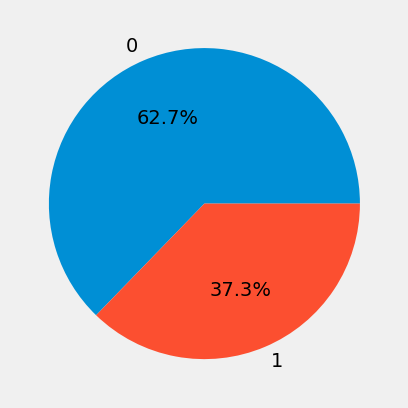

In [127]:
bm = df3['diagnosis'].value_counts()
plt.style.use("fivethirtyeight")
plt.pie(bm.values, labels = bm.index, autopct="%1.1f%%")
plt.show() 

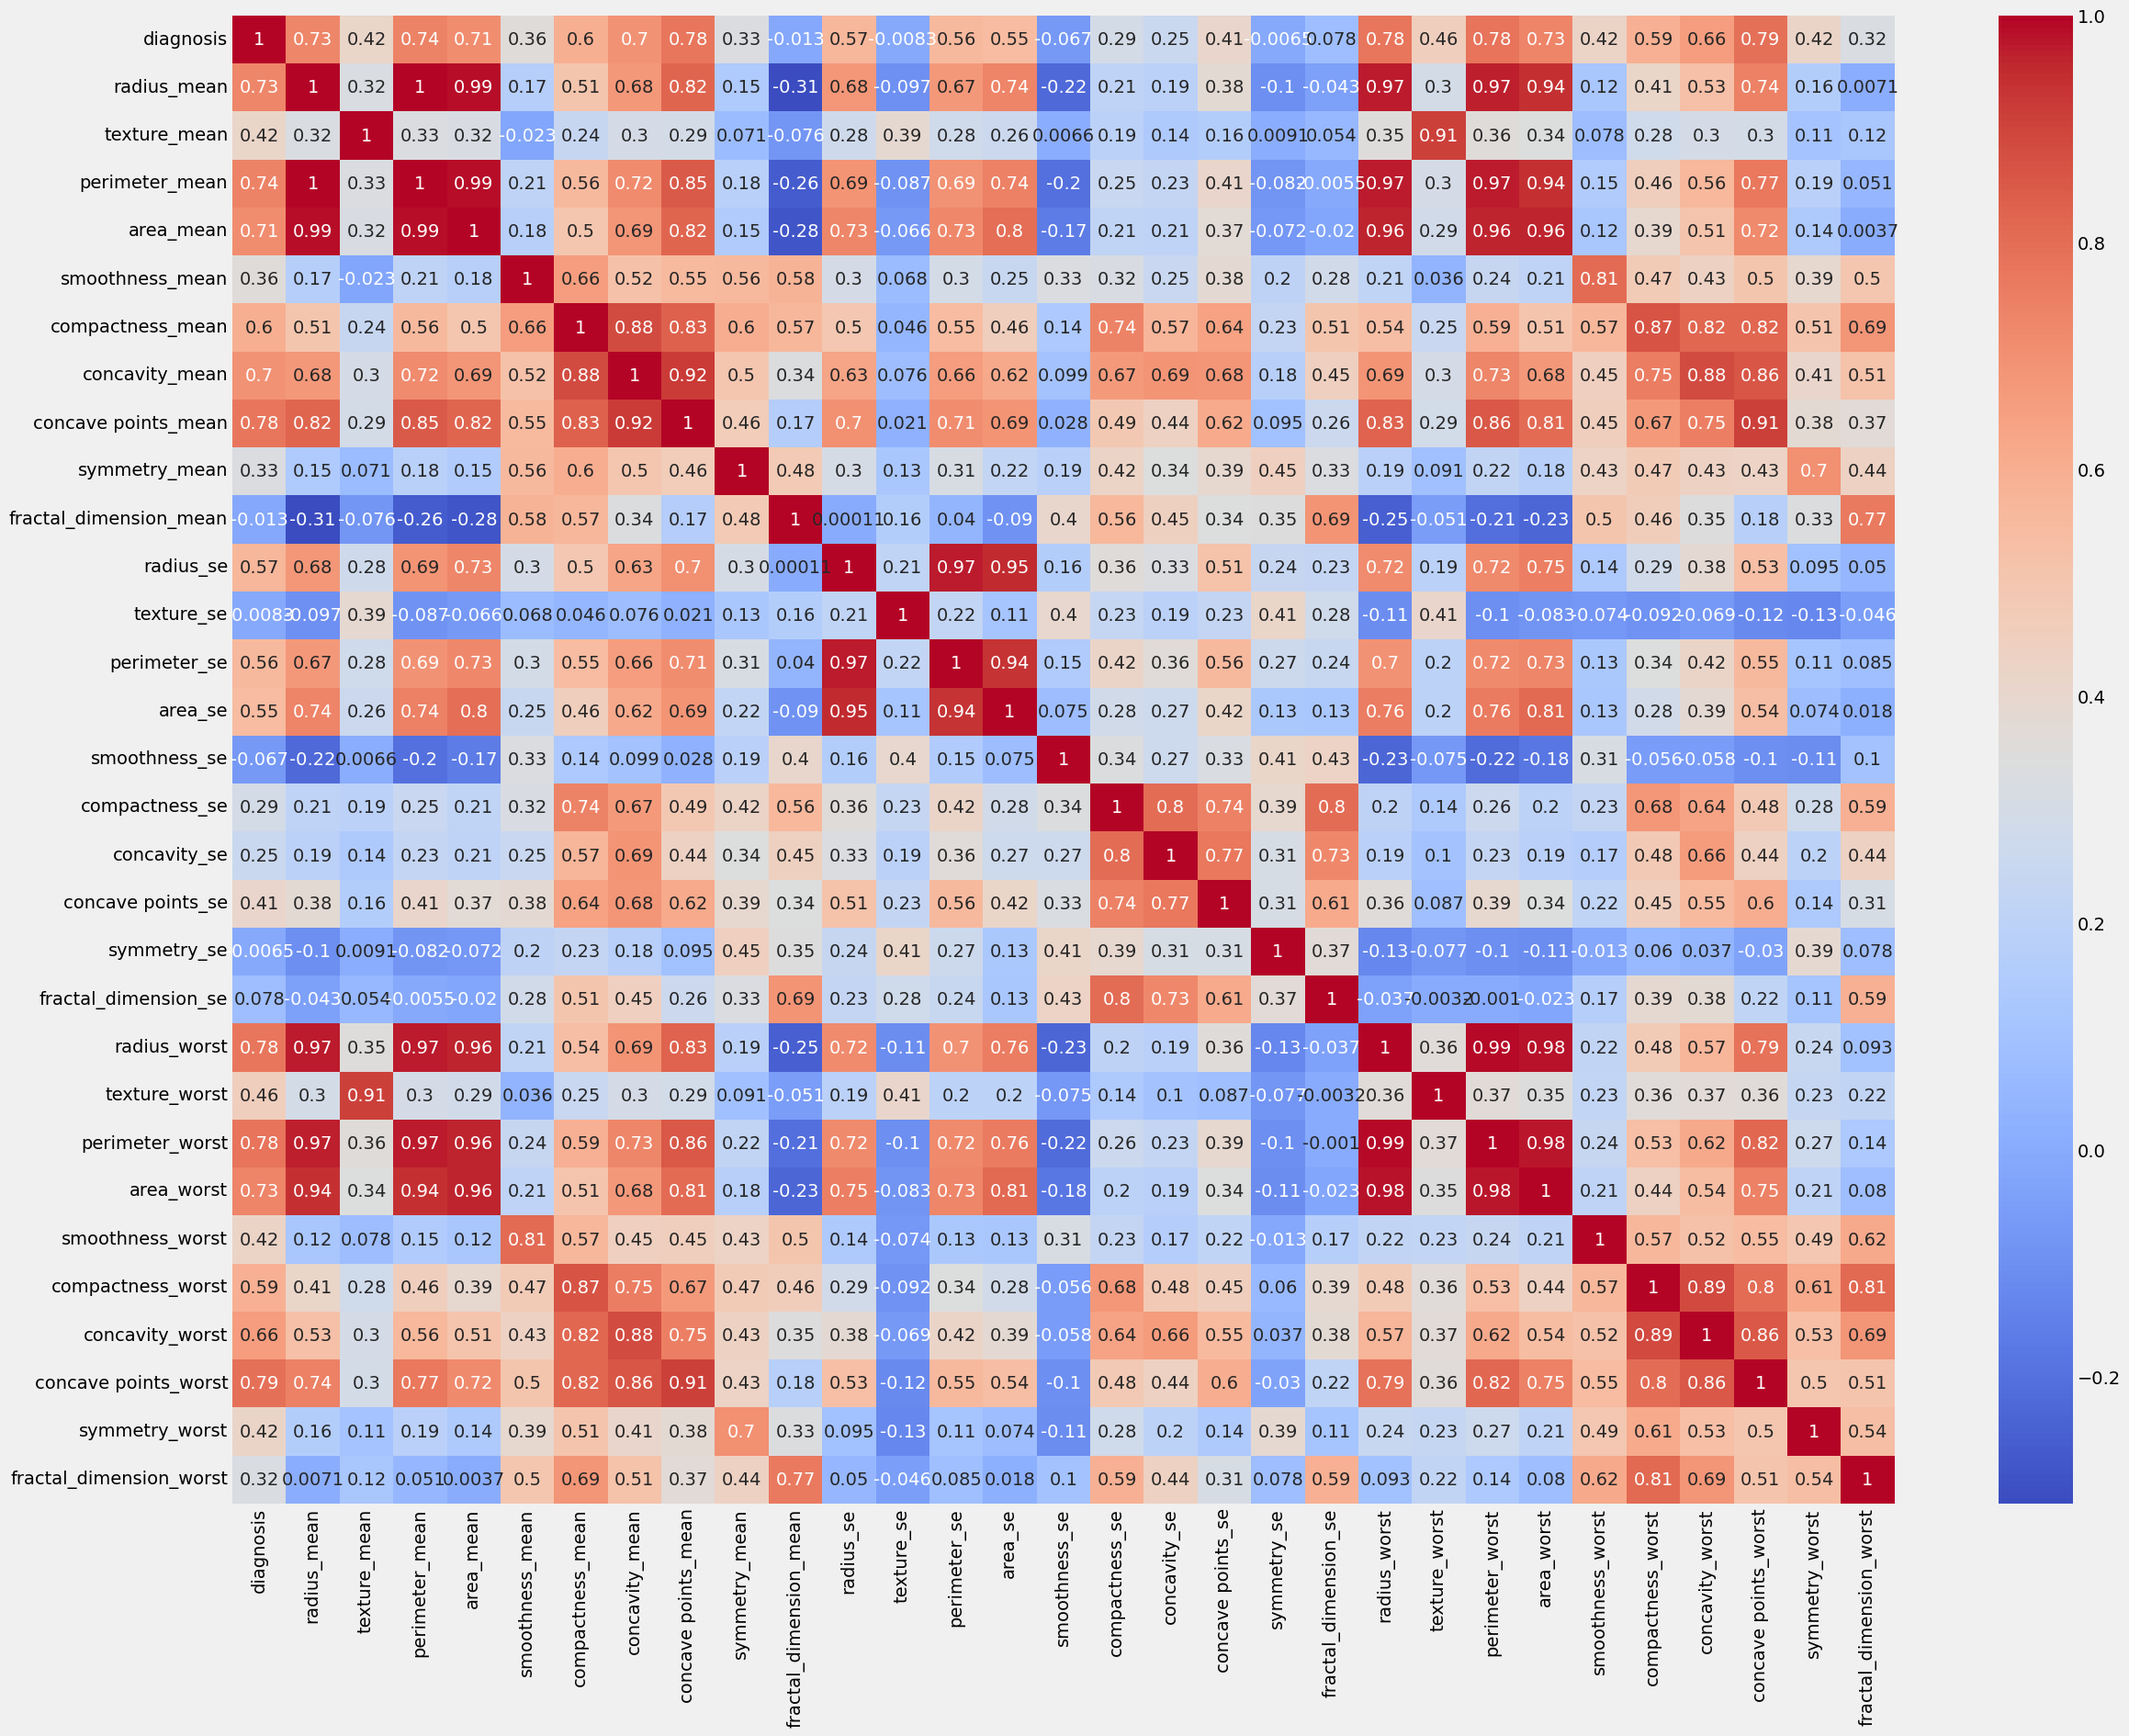

In [128]:
corr = df3.corr()
fig = plt.figure(figsize = (26, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

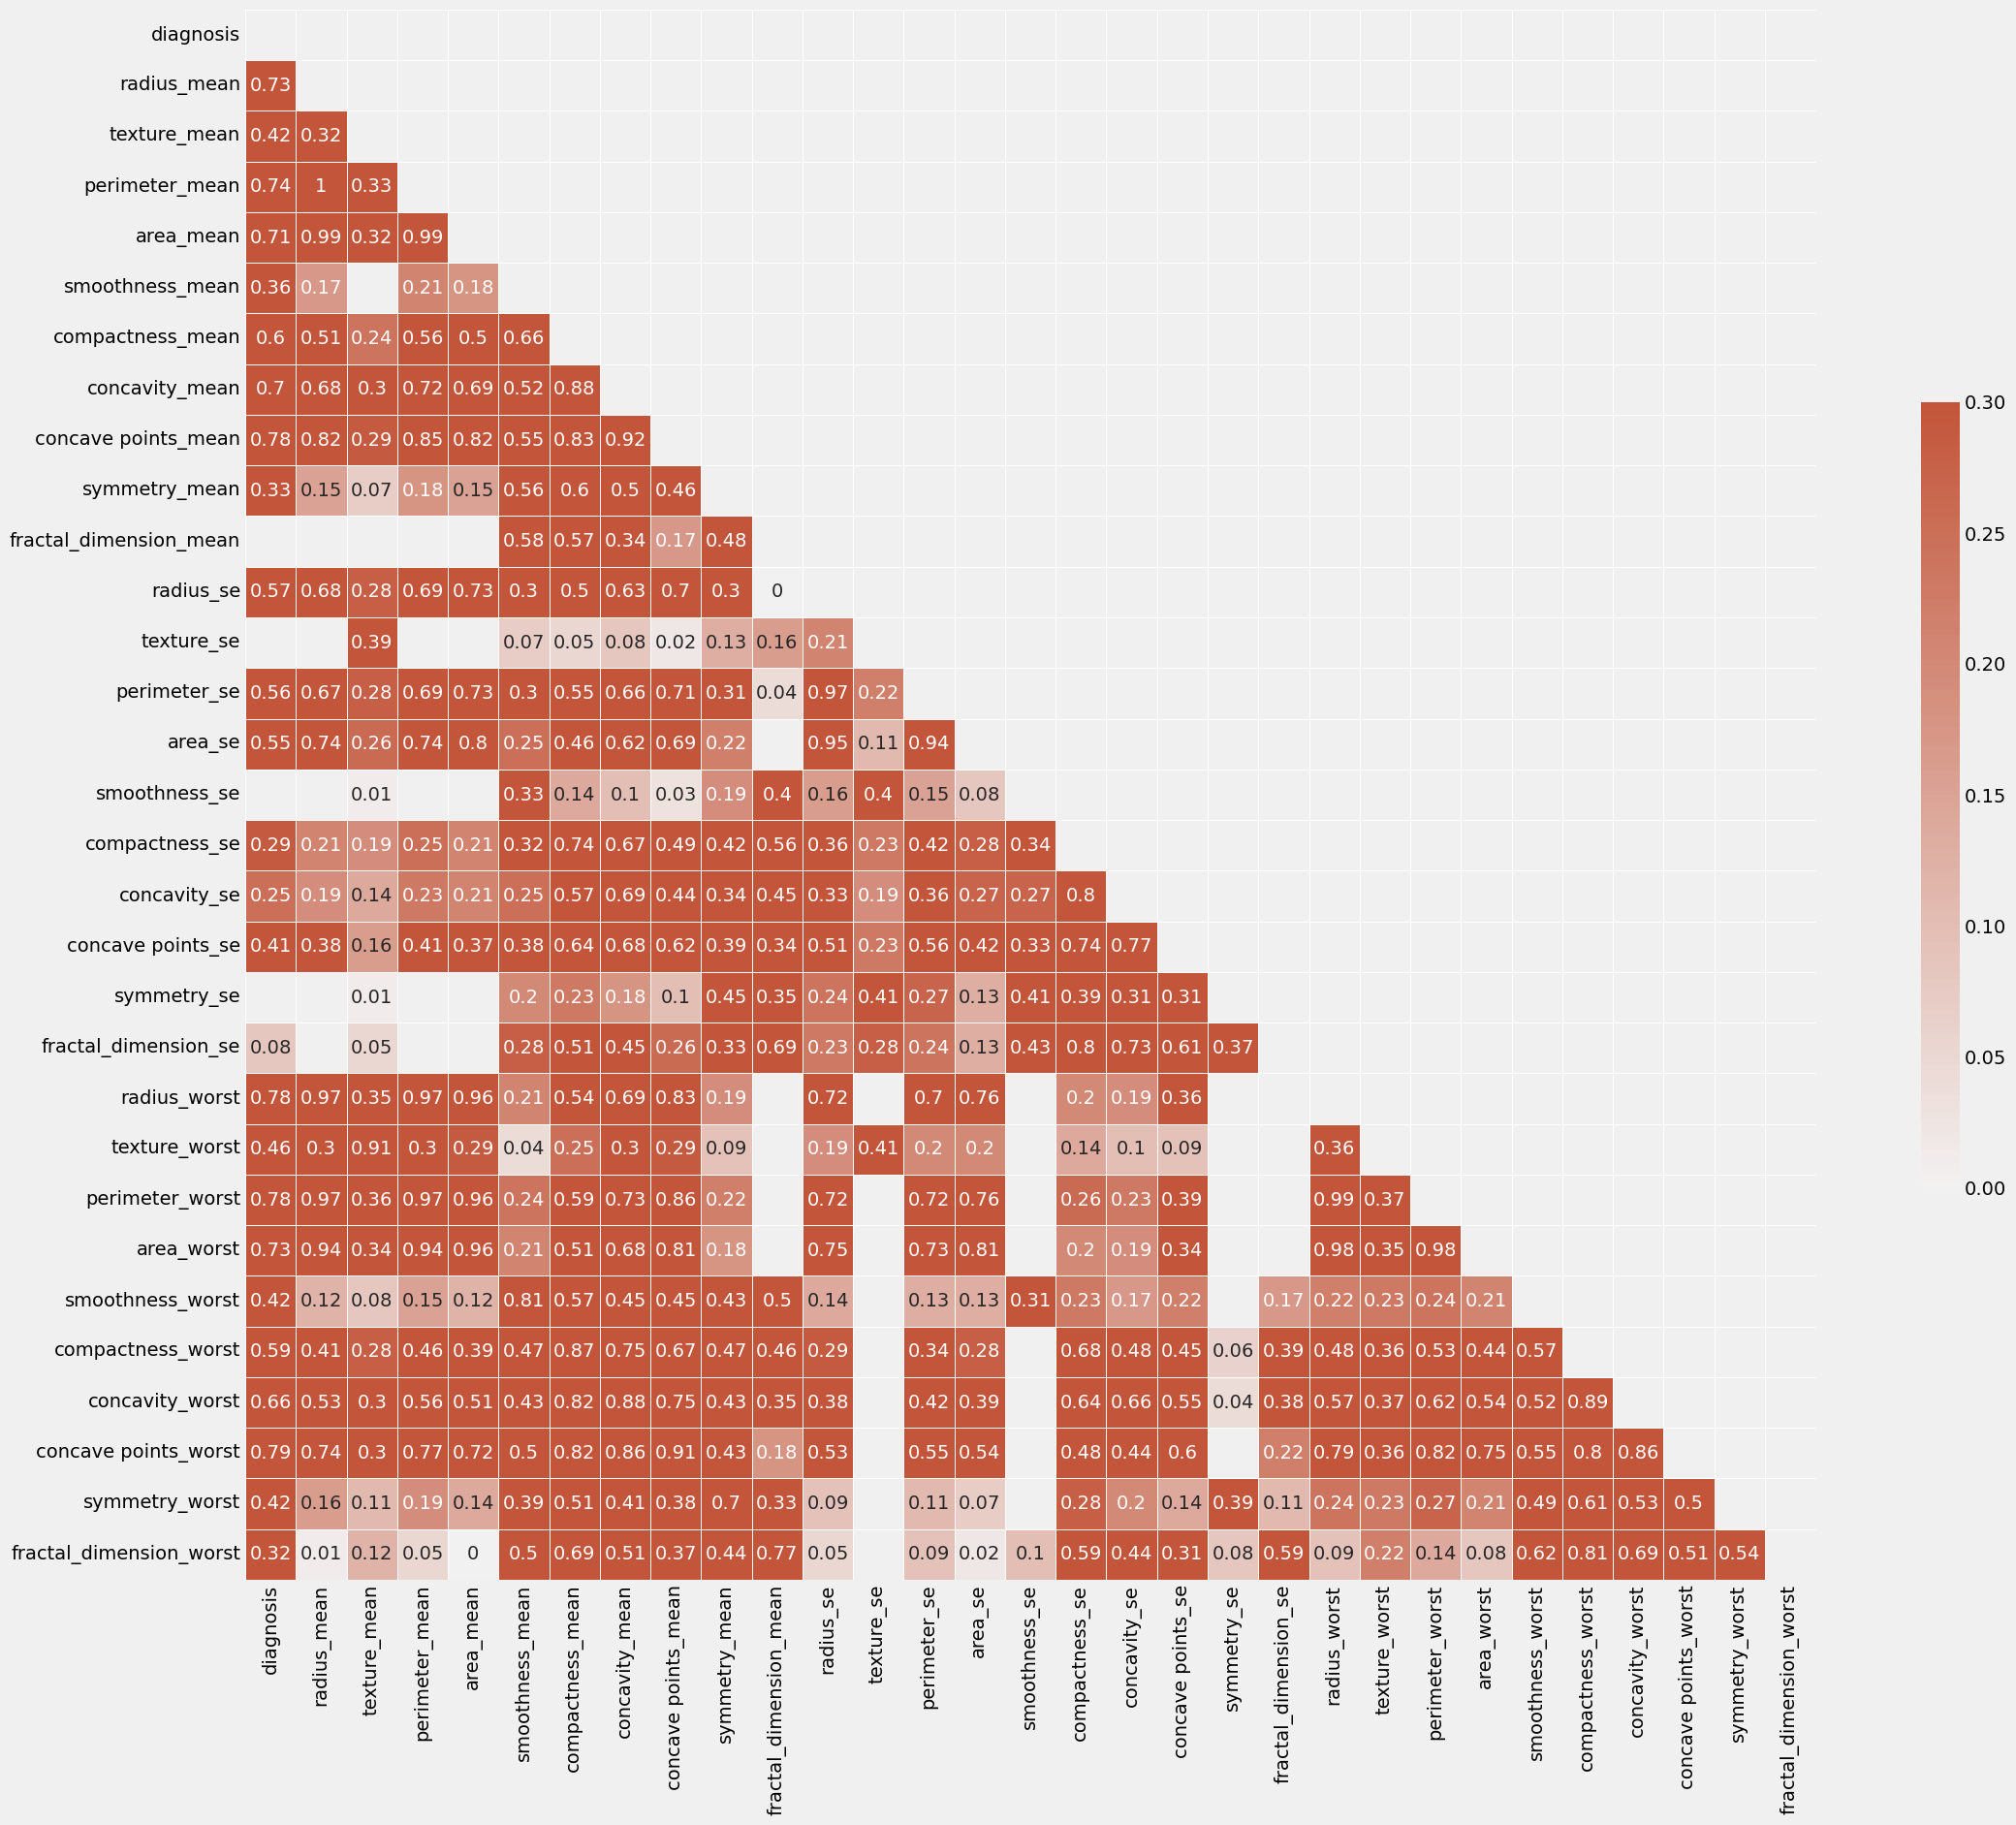

In [129]:
#Correlation Heatmap with only positive correlations
corr = df3.corr()
corr = np.around(corr[corr > 0.0],2)                #Filtering out any negative correlation
mask = np.triu(np.ones_like(corr, dtype=bool))      
f, ax = plt.subplots(figsize=(25,20))               
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

<AxesSubplot:>

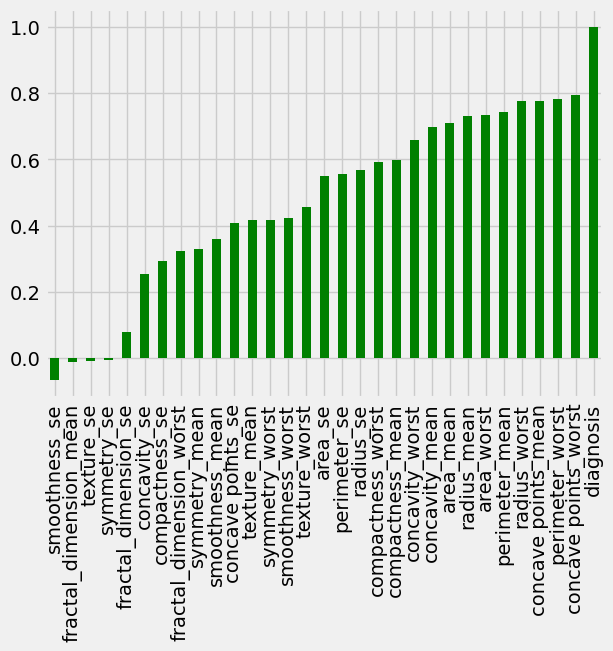

In [130]:
df3.corr()['diagnosis'].sort_values().plot(kind='bar', color = 'green')

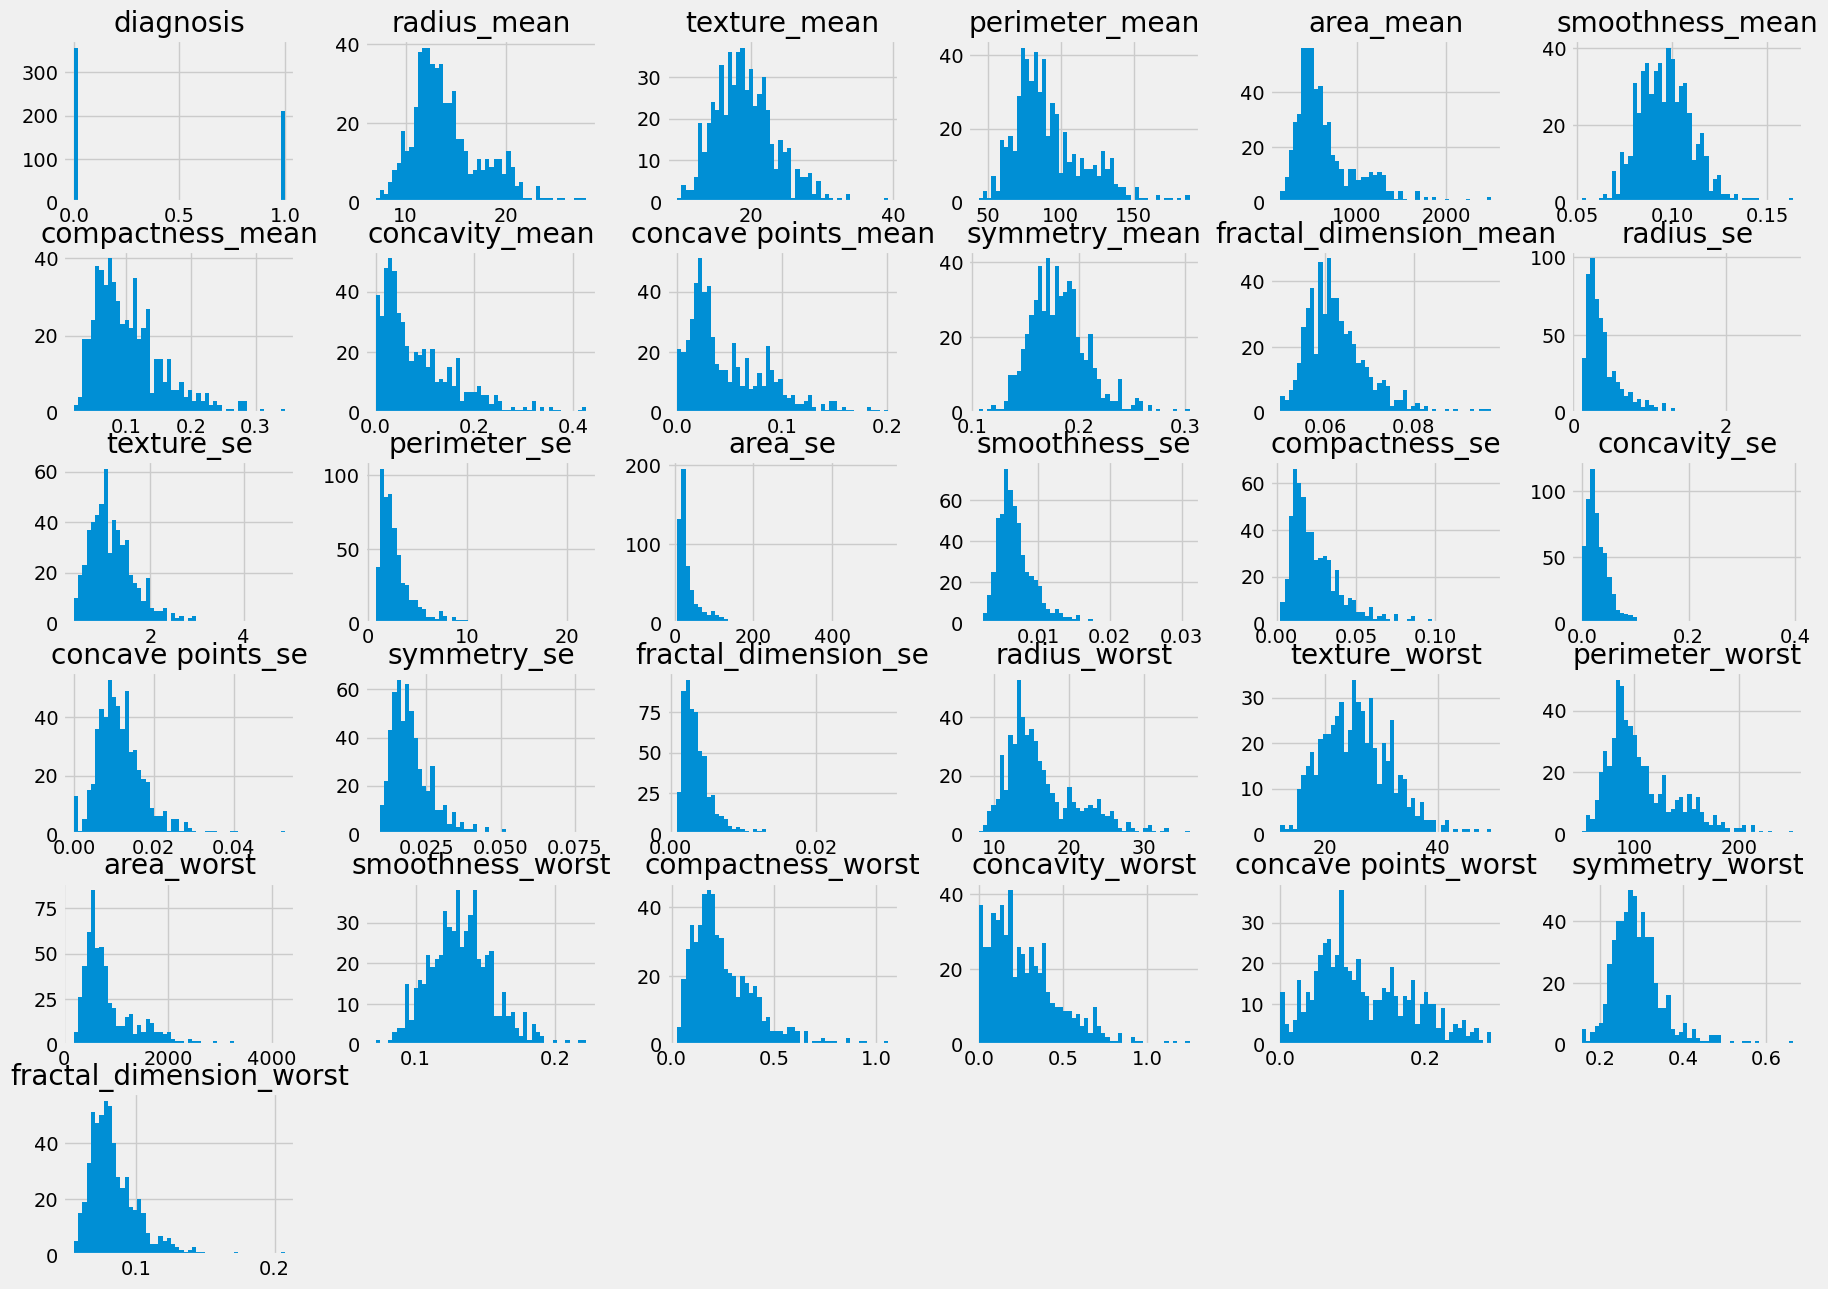

In [131]:
df3.hist(bins = 50 , figsize = (20,15))
plt.show()

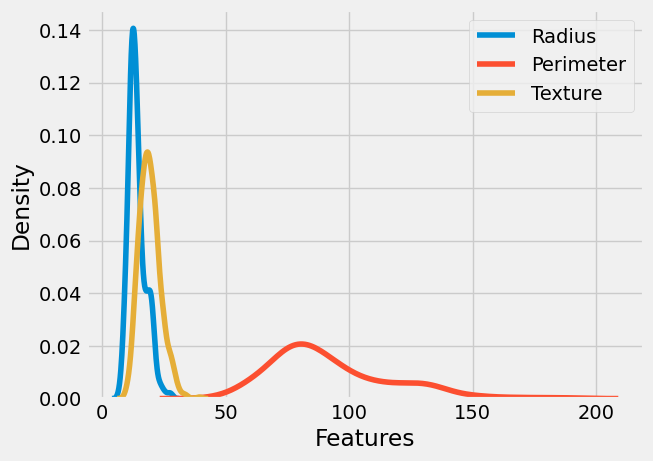

In [132]:
fig, ax = plt.subplots()
sns.kdeplot(df3['radius_mean'], label="Radius")
sns.kdeplot(df3['perimeter_mean'], label = "Perimeter")
sns.kdeplot(df3['texture_mean'], label = "Texture")
plt.xlabel('Features')
ax.legend()

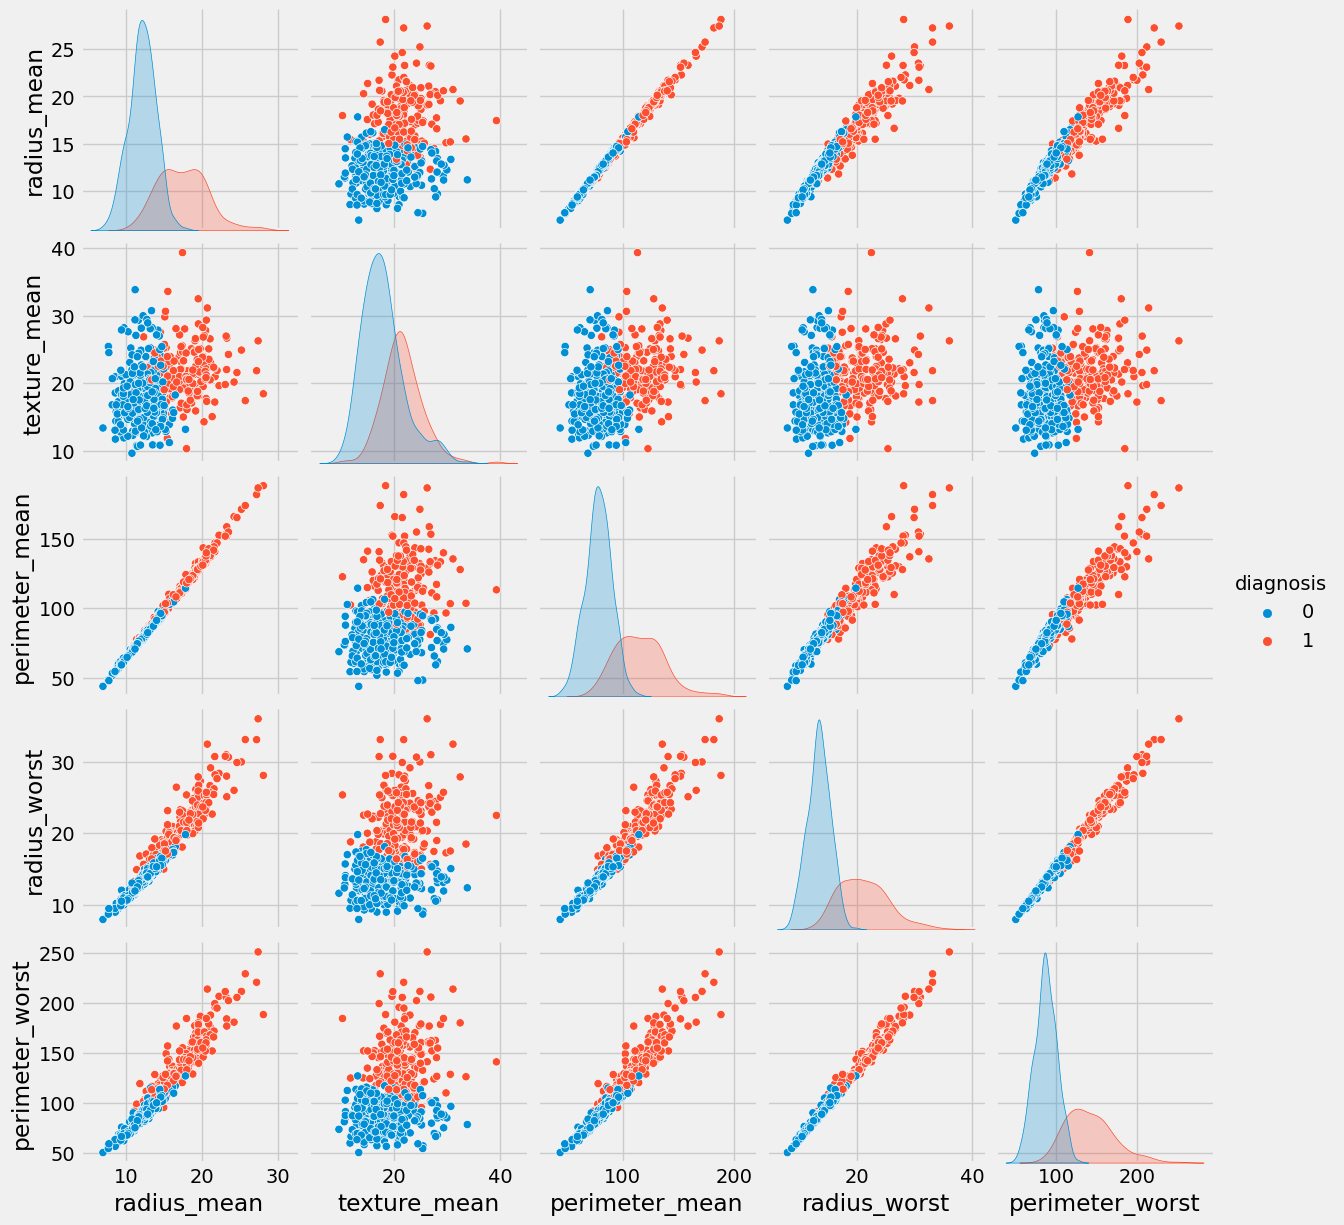

In [133]:
sns.pairplot(df3, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "radius_worst", "perimeter_worst"])
plt.show()

Text(0.5, 1.0, 'Graph of texture mean vs diagnosis of tumor')

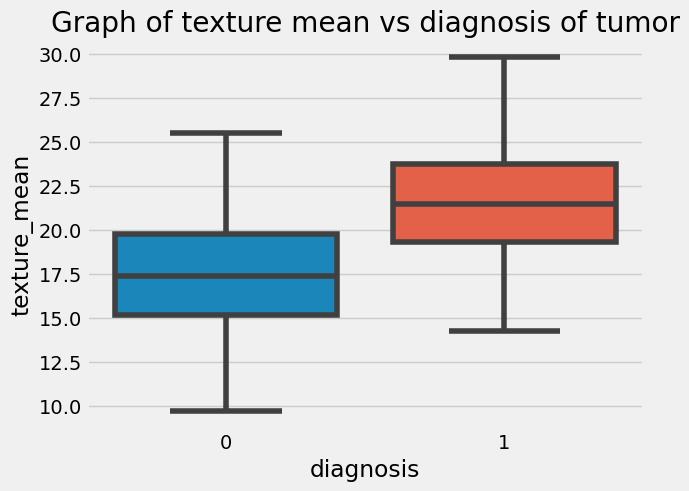

In [134]:
figsize = (8,4)
plt = sns.boxplot(x = 'diagnosis', y = 'texture_mean', data=df3, showfliers=False)
plt.set_title('Graph of texture mean vs diagnosis of tumor')

Text(0.5, 1.0, 'Graph of radius mean vs diagnosis of tumor')

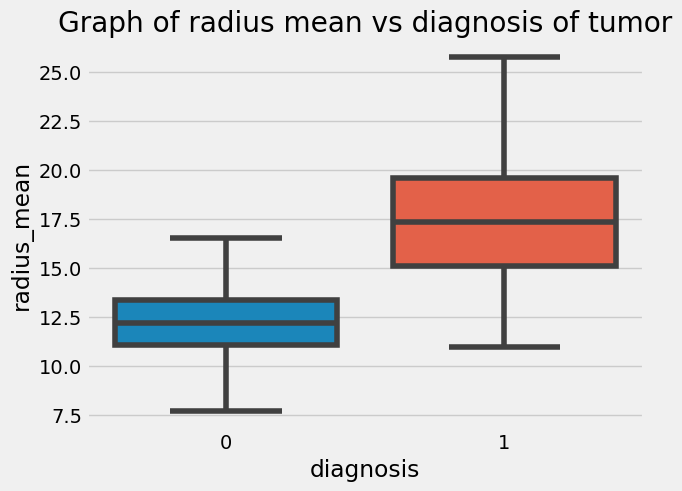

In [135]:
plt = sns.boxplot(x = 'diagnosis', y = 'radius_mean', data=df3, showfliers=False)
plt.set_title('Graph of radius mean vs diagnosis of tumor')

Text(0.5, 1.0, 'Graph of radius worst vs diagnosis of tumor')

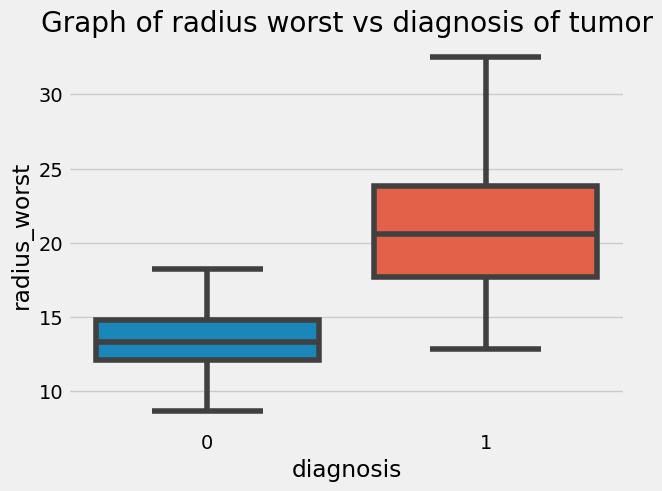

In [136]:
figsize = (8,4)
plt = sns.boxplot(x = 'diagnosis', y = 'radius_worst', data=df3, showfliers=False)
plt.set_title('Graph of radius worst vs diagnosis of tumor')

Text(0.5, 1.0, 'Graph of area worst vs diagnosis of tumor')

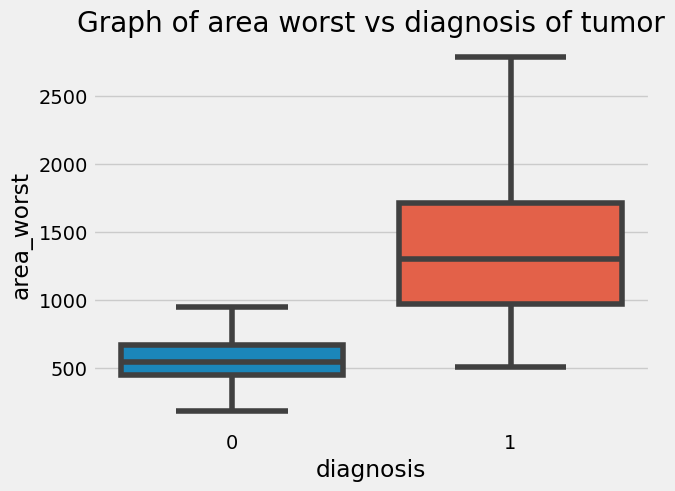

In [137]:
figsize = (8,4)
plt = sns.boxplot(x = 'diagnosis', y = 'area_worst', data=df3, showfliers=False)
plt.set_title('Graph of area worst vs diagnosis of tumor')

<AxesSubplot:xlabel='radius_worst', ylabel='area_worst'>

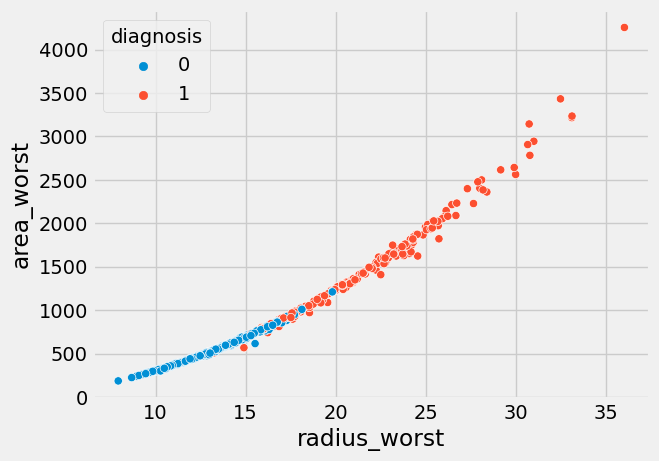

In [138]:
sns.scatterplot(x='radius_worst', y='area_worst', hue='diagnosis', data=df3)

<AxesSubplot:xlabel='radius_worst', ylabel='perimeter_worst'>

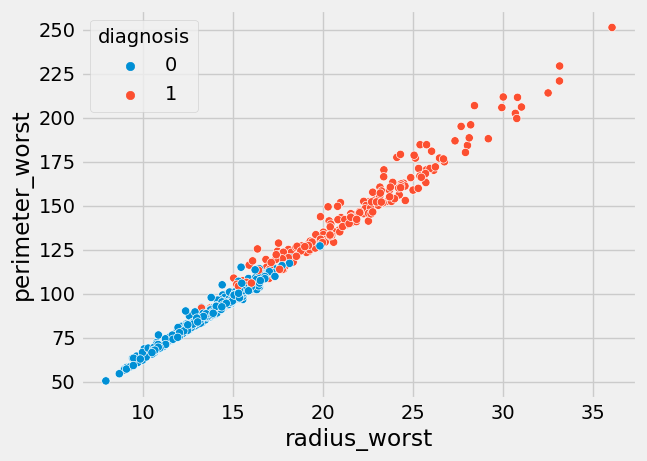

In [139]:
sns.scatterplot(x='radius_worst', y='perimeter_worst', hue='diagnosis', data=df3)

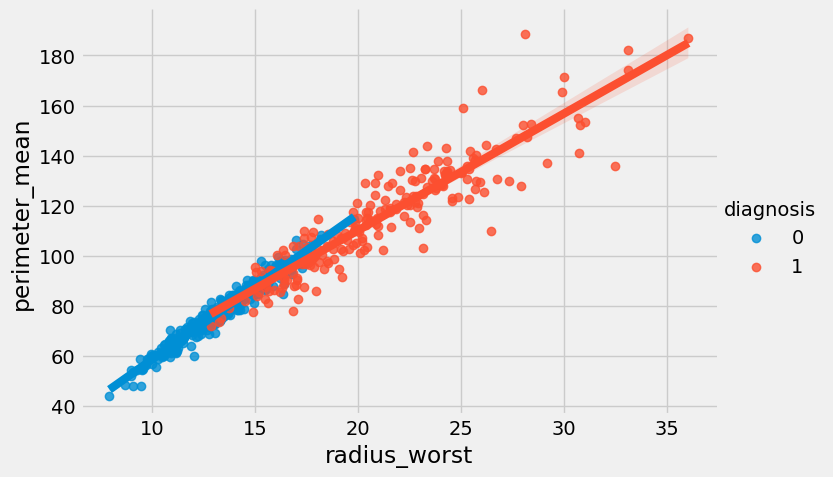

In [140]:
sns.lmplot(x='radius_worst', y='perimeter_mean', hue='diagnosis', data=df3, aspect=1.5, height=5)

# Classification Models

In [141]:
X = df3.drop(['diagnosis'], axis=1)
y = df3.diagnosis

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Support Vector Classifier

In [143]:
svc = SVC()
svc.fit(X_train, y_train)

prediction = svc.predict(X_test) 
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(f"ROC-AUC Score: {roc_auc_score(y_test, prediction)}")
print(f"Accuracy Score: {accuracy_score(y_test, prediction)}")
print(f"Precision Score: {precision_score(y_test, prediction)}")
acc_svc = accuracy_score(y_test, prediction)*100

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

[[71  0]
 [ 6 37]]
ROC-AUC Score: 0.9302325581395349
Accuracy Score: 0.9473684210526315
Precision Score: 1.0


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


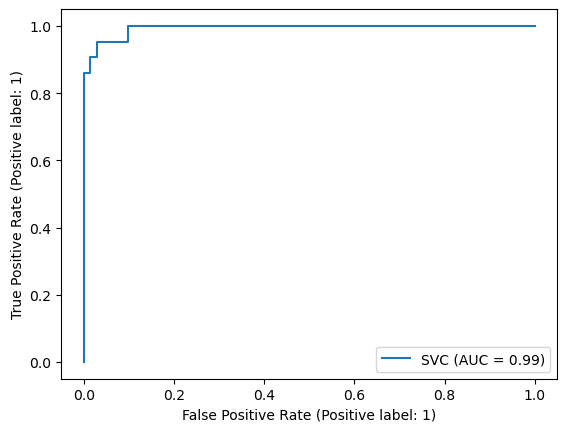

In [17]:
metrics.plot_roc_curve(svc, X_test, y_test)
plt.show()

### Logistic Regression

In [146]:
log_regr = LogisticRegression() 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_args = {
    'penalty':['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 0.9, 1, 2, 10, 100],
    'solver': ['newton-cg', 'lbfgs''liblinear', 'sag', 'saga']
}

grid_lgr = GridSearchCV(estimator = log_regr, 
                        param_grid = log_args, 
                        cv = cv, 
                        verbose = 1, 
                        scoring = 'roc_auc')
result_lgr = grid_lgr.fit(X_train, y_train)
result_lgr.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Incr

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [147]:
log_regr = log_regr.set_params(**result_lgr.best_params_)
log_regr.fit(X_train, y_train)
prediction = log_regr.predict(X_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(f"ROC-AUC Score: {roc_auc_score(y_test, prediction)}")
print(f"Accuracy Score: {accuracy_score(y_test, prediction)}")
print(f"Precision Score: {precision_score(y_test, prediction)}")
acc_log_regr = accuracy_score(y_test, prediction)*100

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[70  1]
 [ 4 39]]
ROC-AUC Score: 0.9464461185718964
Accuracy Score: 0.956140350877193
Precision Score: 0.975


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


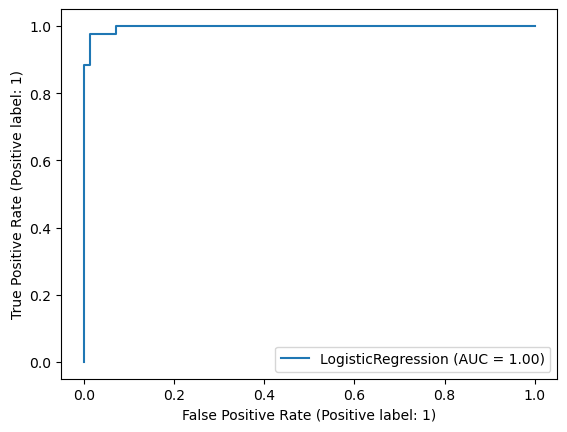

In [19]:
metrics.plot_roc_curve(log_regr, X_test, y_test)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

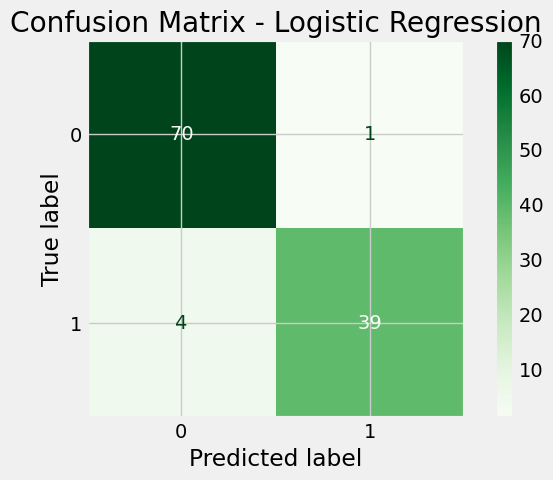

In [84]:
from sklearn.metrics import  plot_confusion_matrix
disp = plot_confusion_matrix(log_regr, X_test, y_test, cmap = 'Greens', values_format='.3g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Logistic Regression')

### Decision Tree Classifier

In [166]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
prediction = dec_tree.predict(X_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(f"ROC-AUC Score: {roc_auc_score(y_test, prediction)}")
print(f"Accuracy Score: {accuracy_score(y_test, prediction)}")
print(f"Precision Score: {precision_score(y_test, prediction)}")
acc_dec_tree = accuracy_score(y_test, prediction)*100

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

[[68  3]
 [ 4 39]]
ROC-AUC Score: 0.9323616115296429
Accuracy Score: 0.9385964912280702
Precision Score: 0.9285714285714286


[Text(0.6145833333333334, 0.9375, 'X[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.3958333333333333, 0.8125, 'X[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.2916666666666667, 0.6875, 'X[10] <= 0.626\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.20833333333333334, 0.5625, 'X[24] <= 0.178\ngini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.16666666666666666, 0.4375, 'X[14] <= 0.003\ngini = 0.015\nsamples = 259\nvalue = [257, 2]'),
 Text(0.08333333333333333, 0.3125, 'X[26] <= 0.195\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.3125, 'X[21] <= 33.35\ngini = 0.008\nsamples = 252\nvalue = [251, 1]'),
 Text(0.20833333333333334, 0.1875, 'gini = 0.0\nsamples = 237\nvalue = [237, 0]'),
 Text(0.2916666666666667, 0.1875, 'X[21] <= 33.56\ngini = 0.124\nsamples = 15\nvalue 

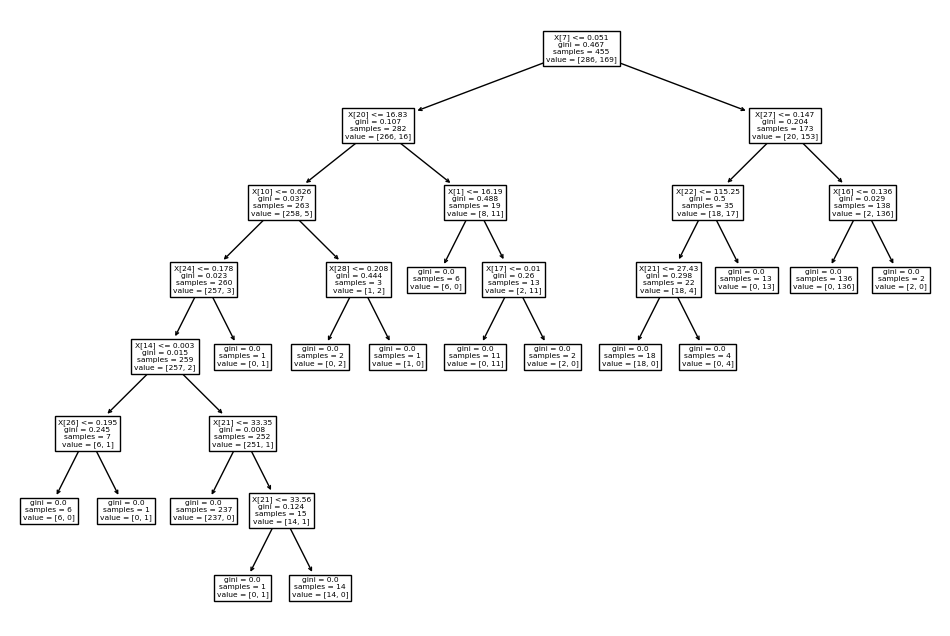

In [21]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dec_tree.fit(X_train, y_train)) 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


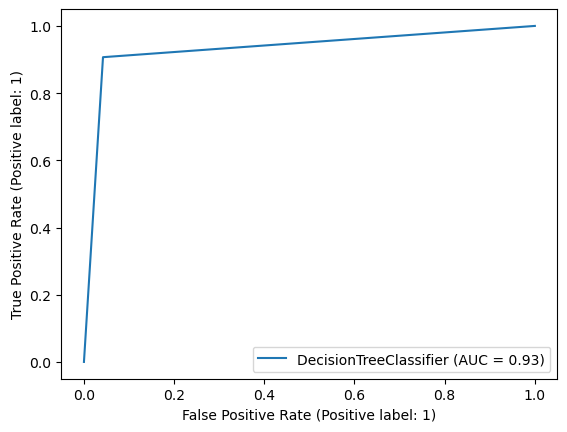

In [22]:
metrics.plot_roc_curve(dec_tree, X_test, y_test)
plt.show()

### Random Forest Classifier

In [158]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(f"ROC-AUC Score: {roc_auc_score(y_test, prediction)}")
print(f"Accuracy Score: {accuracy_score(y_test, prediction)}")
print(f"Precision Score: {precision_score(y_test, prediction)}")
acc_rf = accuracy_score(y_test, prediction)*100

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[70  1]
 [ 3 40]]
ROC-AUC Score: 0.9580740255486406
Accuracy Score: 0.9649122807017544
Precision Score: 0.975609756097561


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


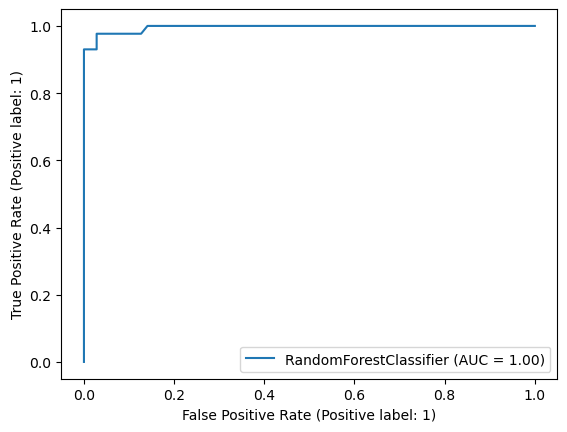

In [24]:
metrics.plot_roc_curve(rf, X_test, y_test)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix - RFC')

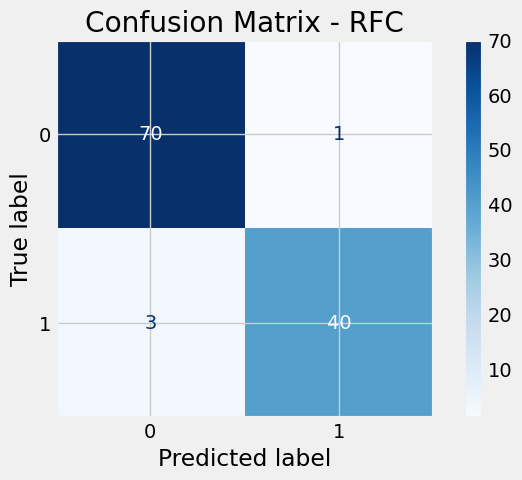

In [85]:
from sklearn.metrics import  plot_confusion_matrix
disp = plot_confusion_matrix(rf, X_test, y_test, cmap = "Blues", values_format='.3g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - RFC')

It can be seen that the highest precision and accuracy scores are recorded for the Random Forest Classifier Model and the Logistic Regression Model, so these models are the best fits for this data.

In [78]:
models = pd.DataFrame({
    'Model': ['Support Vectors Classifier', 'Logistic Regression', 
              'Decision Tree Classifer', 'Random Forest Classifier'],
    'Accuracy Score': [acc_svc, acc_log_regr, acc_dec_tree, acc_rf]})
models.sort_values(by='Accuracy Score', ascending=False)

Model  Accuracy Score
3    Random Forest Classifier       96.491228
1         Logistic Regression       95.614035
0  Support Vectors Classifier       94.736842
2     Decision Tree Classifer       94.736842

## Hyperparameter Tuning for SVC Model

In [26]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
            }

clf = SVC(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'C': 100, 'kernel': 'linear'}
Accuracy:0.9578204771187228


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy Score: 0.9473684210526315
Precision Score: 0.9512195121951219


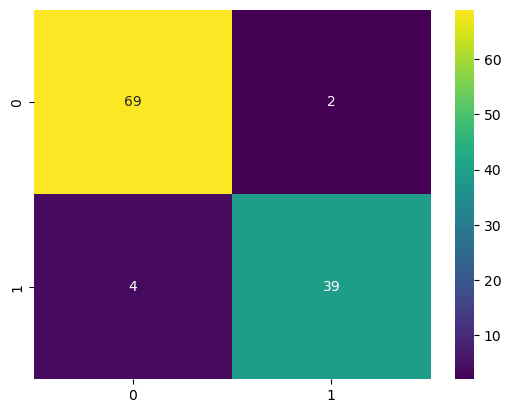

In [27]:
svc = SVC(C=100, kernel='linear', gamma='scale').fit(X_train,y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
print(classification_report(y_test,y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

## Hyperparameter Tuning for RFC Model

In [28]:
params = {
    'criterion':['gini','entropy'],
    'n_estimators':[20,50,75,100],
    'max_features':['auto','sqrt','log2'],
    'class_weight':['balanced','balanced_subsample']
}

In [29]:
rf = RandomForestClassifier()
grid = GridSearchCV(rf, params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}
Accuracy:0.9683746403044649


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score: 0.9649122807017544
Precision Score: 0.975609756097561


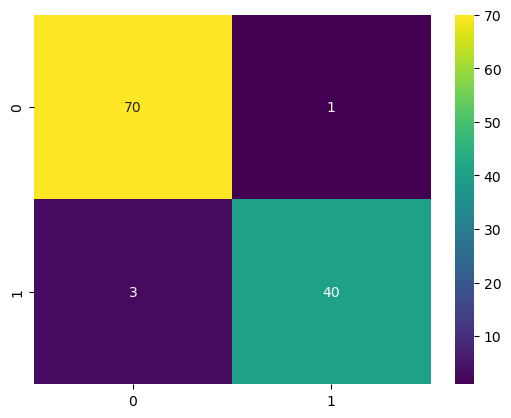

In [30]:
final_rfmodel = RandomForestClassifier(n_estimators=75, class_weight='balanced', criterion='entropy', max_features='auto')

final_rfmodel.fit(X_train,y_train)

y_pred = final_rfmodel.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
print(classification_report(y_test,y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

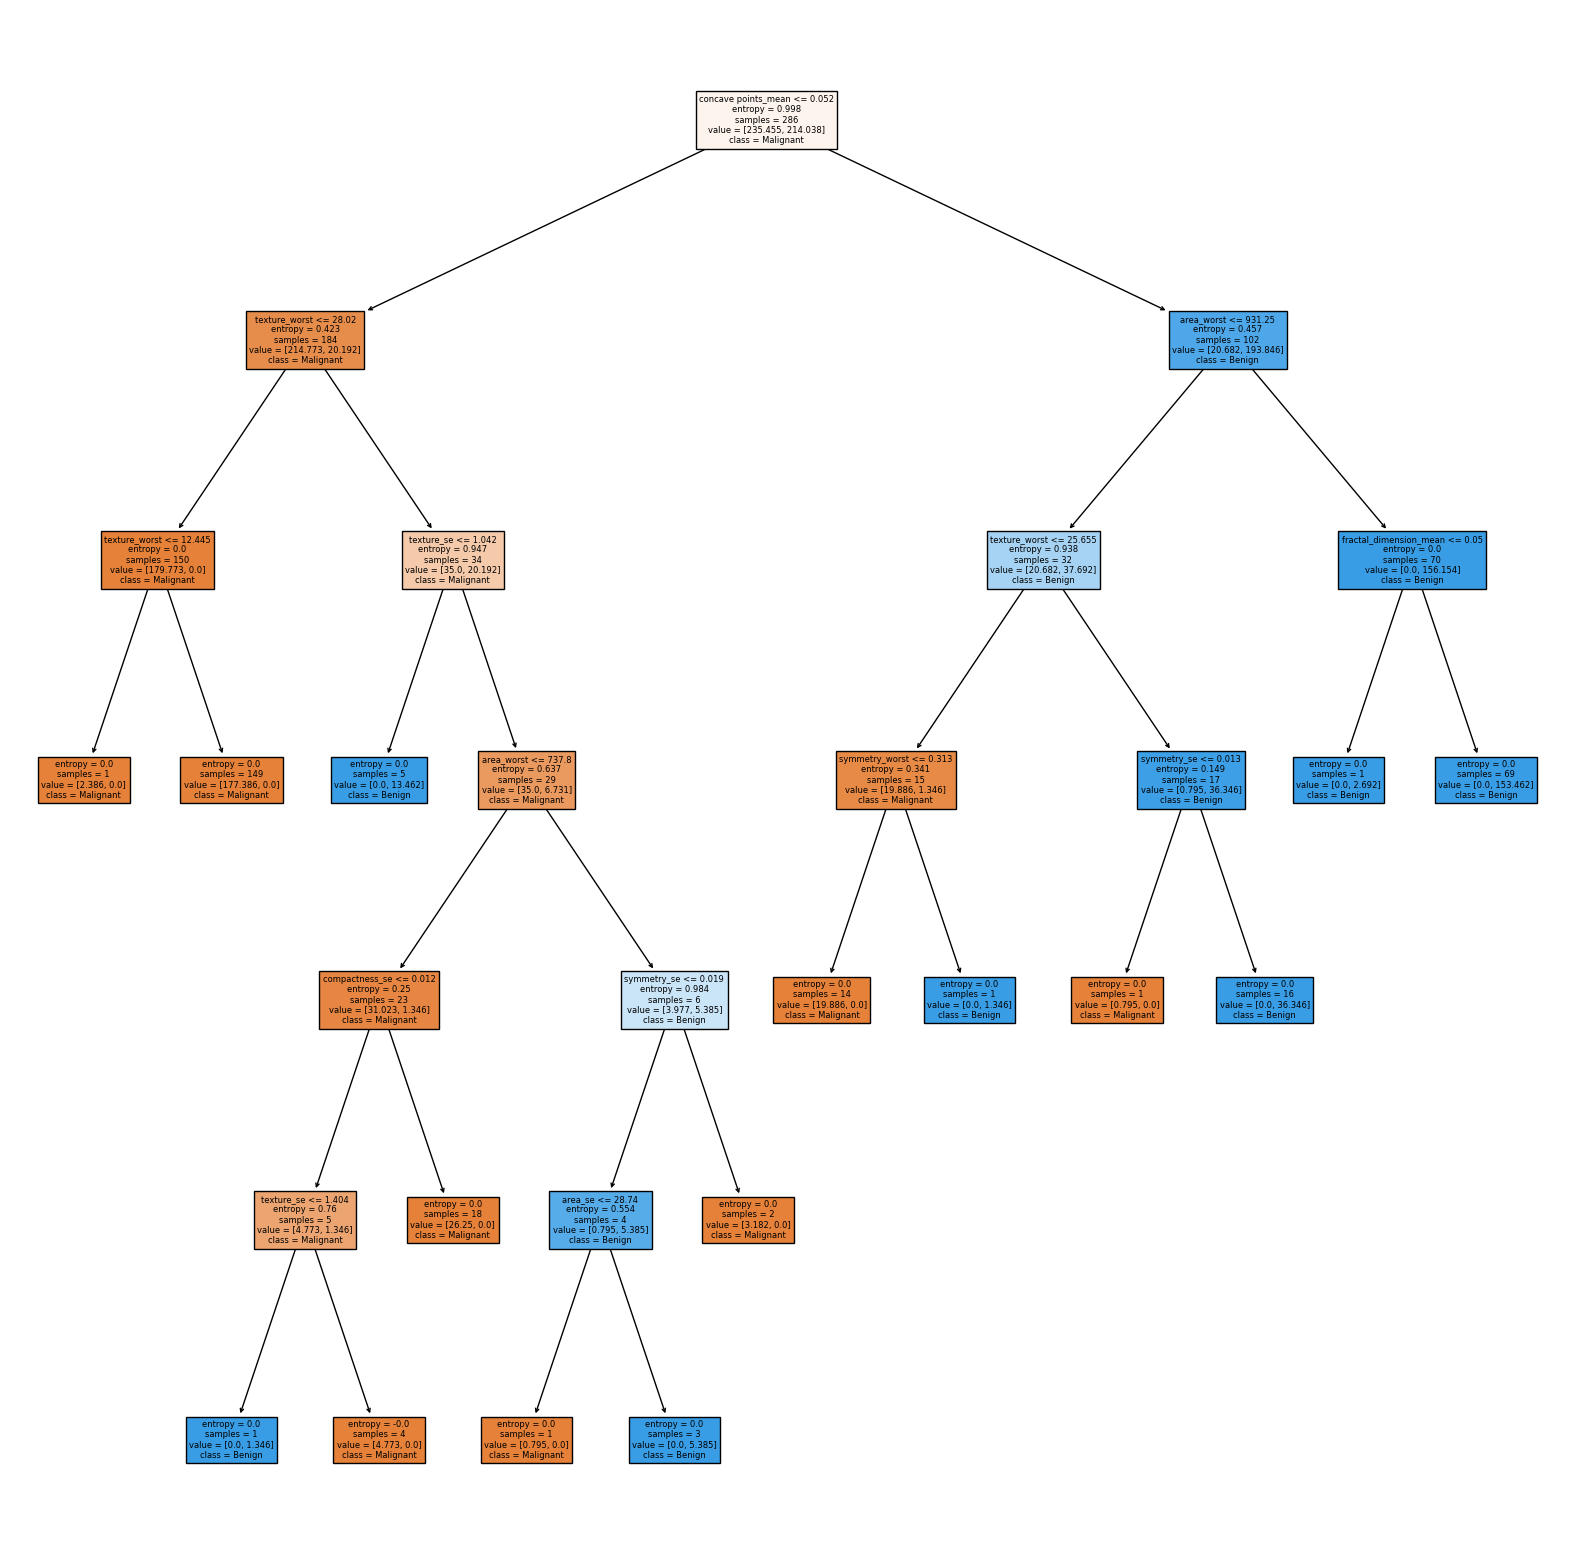

In [31]:
Class = ['Malignant', 'Benign']


from sklearn import tree

plt.figure(figsize = (20,20))
_= tree.plot_tree(final_rfmodel.estimators_[0], feature_names = X.columns, filled = True, class_names = Class)